# README

given the GPCRdb data 'gpcr_filtered_mutants_0217.csv', check the impact of different ligand class.


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
import re
import requests
import scipy as sp

In [143]:
# read in the file
gpcr_ori = pd.read_csv('gpcr_filtered_mutants_0217.csv')
gpcr_ori

,Unnamed: 0,reference,protein,mutation_pos,mutation_from,mutation_to,ligand_name,ligand_idtype,ligand_id,ligand_class,...,exp_mu_effect_value,exp_fold_change,exp_mu_effect_qual,exp_mu_effect_ligand_prop,exp_mu_ligand_ref,opt_receptor_expression,opt_basal_activity,opt_gain_of_activity,opt_ligand_emax,opt_agonist
0,0,8903934,hrh1_human,194,T,A,(S)-cetirizine,ChEMBL Compound ID,CHEMBL1334217,Binding - unknown pharmacological activity,...,8.000,-10.000,NaN,NaN,[3H]-mepyramine (radioligand),0.0,0.0,NaN,0.0,NaN
1,1,15033376,hrh1_human,432,F,A,[3H]-mepyramine,ChEMBL Compound ID,CHEMBL511,Binding - unknown pharmacological activity,...,30.000,23.077,NaN,NaN,[3H]-mepyramine (radioligand),0.0,0.0,NaN,0.0,NaN
2,2,8198587,hrh1_human,198,N,A,[3H]-mepyramine,ChEMBL Compound ID,CHEMBL511,Binding - unknown pharmacological activity,...,0.790,1.362,NaN,NaN,[3H]-mepyramine (radioligand),102.6,0.0,NaN,0.0,NaN
3,3,17959710,hrh1_human,420,I,E,Histamine,ChEMBL Compound ID,CHEMBL90,Binding - unknown pharmacological activity,...,6.700,-5.000,NaN,NaN,[3H]-mepyramine (radioligand),9.1,0.0,NaN,0.0,NaN
4,5,15626750,hrh1_human,433,I,V,Histamine,ChEMBL Compound ID,CHEMBL90,Binding - unknown pharmacological activity,...,4.500,-1.585,NaN,NaN,[3H]-mepyramine (radioligand),81.8,0.0,NaN,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12017,455,10.1021/jm020211+,aa3r_human,243,W,A,Compound39,SMILES,CCCC1C(=C(CC)N=C(c2ccccc2)C1(CCC)C([O-])=O)C(=...,Inverse agonist,...,2150.000,9.034,NaN,NaN,I-AB-MECA,0.0,0.0,=,0.0,NaN
12018,456,10.1124/mol.63.5.1021,aa3r_human,243,W,A,DU124183,PubChem CID,10426659,Allosteric inverse agonist,...,3.600,3.000,NaN,NaN,I-AB-MECA,0.0,0.0,=,0.0,NaN
12019,458,10.1021/jm050968b,aa3r_human,272,H,D,CID85116573,PubChem CID,85116573,Full agonist,...,0.850,-11.236,NaN,NaN,I-AB-MECA,0.0,0.0,=,0.0,NaN
12020,459,10.1124/mol.63.5.1021,aa3r_human,244,L,A,DU124183,PubChem CID,10426659,Allosteric inverse agonist,...,2.100,1.750,NaN,NaN,I-AB-MECA,0.0,0.0,=,0.0,NaN


In [977]:
# read in all gene names
gene_list_raw =pd.read_csv("230323_EST_ENSG_GENE_new.csv")
gene_list_raw.rename(columns={'gene':'SYMBOL'},inplace=True)
gene_list_raw

,index,ENST,ENSG,protein,SYMBOL,Uniprot
0,0,ENST00000646641,ENSG00000267534,s1pr2_human,S1PR2,O95136
1,121,ENST00000547270,ENSG00000257138,t2r38_human,TAS2R38,P59533
2,219,ENST00000390675,ENSG00000256436,t2r31_human,TAS2R31,P59538
3,344,ENST00000539585,ENSG00000256188,t2r30_human,TAS2R30,P59541
4,483,ENST00000538986,ENSG00000255837,t2r20_human,TAS2R20,P59543
...,...,...,...,...,...,...
395,64029,ENST00000510937,ENSG00000226306,npy6r_human,NPY6R,Q99463
396,64030,ENST00000641193,ENSG00000279301,o2t11_human,OR2T11,Q8NH01
397,64031,ENST00000641732,ENSG00000172146,or1a1_human,OR1A1,Q9P1Q5
398,64032,ENST00000328890,ENSG00000183024,or1g1_human,OR1G1,P47890


In [978]:
gpcr_ori = gpcr_ori.merge(gene_list_raw[['protein','SYMBOL']],on='protein')
gpcr_ori

,Unnamed: 0,reference,protein,mutation_pos,mutation_from,mutation_to,ligand_name,ligand_idtype,ligand_id,ligand_class,...,exp_fold_change,exp_mu_effect_qual,exp_mu_effect_ligand_prop,exp_mu_ligand_ref,opt_receptor_expression,opt_basal_activity,opt_gain_of_activity,opt_ligand_emax,opt_agonist,SYMBOL
0,0,8903934,hrh1_human,194,T,A,(S)-cetirizine,ChEMBL Compound ID,CHEMBL1334217,Binding - unknown pharmacological activity,...,-10.000,NaN,NaN,[3H]-mepyramine (radioligand),0.0,0.0,NaN,0.0,NaN,HRH1
1,1,15033376,hrh1_human,432,F,A,[3H]-mepyramine,ChEMBL Compound ID,CHEMBL511,Binding - unknown pharmacological activity,...,23.077,NaN,NaN,[3H]-mepyramine (radioligand),0.0,0.0,NaN,0.0,NaN,HRH1
2,2,8198587,hrh1_human,198,N,A,[3H]-mepyramine,ChEMBL Compound ID,CHEMBL511,Binding - unknown pharmacological activity,...,1.362,NaN,NaN,[3H]-mepyramine (radioligand),102.6,0.0,NaN,0.0,NaN,HRH1
3,3,17959710,hrh1_human,420,I,E,Histamine,ChEMBL Compound ID,CHEMBL90,Binding - unknown pharmacological activity,...,-5.000,NaN,NaN,[3H]-mepyramine (radioligand),9.1,0.0,NaN,0.0,NaN,HRH1
4,5,15626750,hrh1_human,433,I,V,Histamine,ChEMBL Compound ID,CHEMBL90,Binding - unknown pharmacological activity,...,-1.585,NaN,NaN,[3H]-mepyramine (radioligand),81.8,0.0,NaN,0.0,NaN,HRH1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12017,455,10.1021/jm020211+,aa3r_human,243,W,A,Compound39,SMILES,CCCC1C(=C(CC)N=C(c2ccccc2)C1(CCC)C([O-])=O)C(=...,Inverse agonist,...,9.034,NaN,NaN,I-AB-MECA,0.0,0.0,=,0.0,NaN,ADORA3
12018,456,10.1124/mol.63.5.1021,aa3r_human,243,W,A,DU124183,PubChem CID,10426659,Allosteric inverse agonist,...,3.000,NaN,NaN,I-AB-MECA,0.0,0.0,=,0.0,NaN,ADORA3
12019,458,10.1021/jm050968b,aa3r_human,272,H,D,CID85116573,PubChem CID,85116573,Full agonist,...,-11.236,NaN,NaN,I-AB-MECA,0.0,0.0,=,0.0,NaN,ADORA3
12020,459,10.1124/mol.63.5.1021,aa3r_human,244,L,A,DU124183,PubChem CID,10426659,Allosteric inverse agonist,...,1.750,NaN,NaN,I-AB-MECA,0.0,0.0,=,0.0,NaN,ADORA3


In [3]:
np.unique(gpcr_ori['ligand_class'].tolist())

array(['Agonist', 'Allosteric agonist', 'Allosteric inverse agonist',
       'Antagonist', 'Antagonist (neutral/silent)',
       'Binding - unknown pharmacological activity', 'Full agonist',
       'Inverse agonist',
       'Negative allosteric modulator - noncompetitive antagonist',
       'Partial agonist', 'Positive allosteric modulator', 'nan'],
      dtype='<U57')

for all mutations, check the disrtibution of foldchange values for different ligand classes

/Users/joannahench/opt/anaconda3/lib/python3.8/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/var/folders/d_/0pdh465d0yj2_tbpjd8dr11c0000gn/T/ipykernel_25299/2027030385.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  p_data['log10_abs_foldchange'] = np.log10(gpcr_ori['exp_fold_change'])


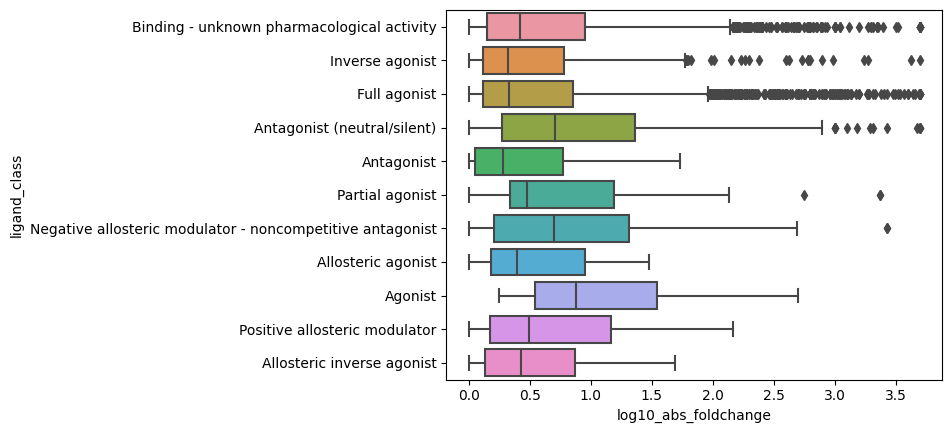

In [145]:
p_data = gpcr_ori[['ligand_class','exp_fold_change']]

# be aware of: The logarithm base 10 is not defined for negative values
p_data['log10_abs_foldchange'] = np.log10(gpcr_ori['exp_fold_change'])

ax = sns.boxplot(data=p_data, x="log10_abs_foldchange", y="ligand_class")

# Set the x-axis range
# ax.set_xlim(left=-700, right=1000)

# Show the plot
plt.show()


for one protein, check the disrtibution of foldchange values for different ligand classes

/Users/joannahench/opt/anaconda3/lib/python3.8/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


<Axes: xlabel='log10_foldchange', ylabel='ligand_class'>

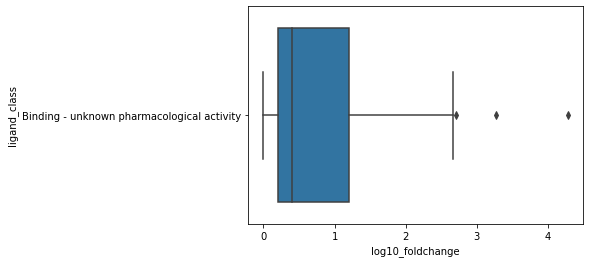

In [36]:
p_data = gpcr_ori[gpcr_ori['SYMBOL']=='acm2_human'][['ligand_class','exp_fold_change']]

p_data['log10_foldchange'] = np.log10(gpcr_ori['exp_fold_change'])
sns.boxplot(data=p_data, x="log10_foldchange", y="ligand_class")


found that, some GPCRs has many different classes of ligands, while some only has one class of ligand: Bindng - unknown pharmacological activity. Now want to check the number of different ligand classes for each GPCR

In [979]:
protein_list = np.unique(gpcr_ori['SYMBOL'].tolist())
protein_list
class_list = np.unique(gpcr_ori['ligand_class'].tolist())
class_list

array(['Agonist', 'Allosteric agonist', 'Allosteric inverse agonist',
       'Antagonist', 'Antagonist (neutral/silent)',
       'Binding - unknown pharmacological activity', 'Full agonist',
       'Inverse agonist',
       'Negative allosteric modulator - noncompetitive antagonist',
       'Partial agonist', 'Positive allosteric modulator', 'nan'],
      dtype='<U57')

In [187]:


# # Get the number of unique ligands and their names for each protein
# ligand_a_counts = p_data.groupby('protein')['ligand_class'].count().reset_index()
# ligand_a_counts.columns=['protein','#var-ligand combinations']

# ligand_counts = p_data.groupby('protein')['ligand_class'].nunique().reset_index()
# ligand_counts.columns=['protein','#ligand classes']
# ligand_names = p_data.groupby('protein')['ligand_class'].unique().reset_index()
# ligand_names.columns=['protein','ligand names']
# # Merge the two dataframes and clean up the column names
# result = pd.merge(ligand_counts, ligand_names, on='protein')

# # result = result.rename(columns={'ligand_class_x': 'number of ligand classes', 'ligand_class_y': 'ligand names'})
# result = pd.merge(result, ligand_a_counts, on='protein')


# # Remove the [ and ] symbols from the ligand names
# result['ligand names'] = result['ligand names'].apply(lambda x: ', '.join(x) )

# # Print the result
# print(result)


protein
5ht1a_human         [Binding - unknown pharmacological activity]
5ht1b_human    [Binding - unknown pharmacological activity, F...
5ht1d_human         [Binding - unknown pharmacological activity]
5ht2a_human    [Full agonist, Binding - unknown pharmacologic...
5ht2b_human    [Binding - unknown pharmacological activity, P...
                                     ...                        
sctr_human     [Full agonist, Binding - unknown pharmacologic...
ts1r3_human    [Negative allosteric modulator - noncompetitiv...
tshr_human                                        [Full agonist]
vipr1_human    [Binding - unknown pharmacological activity, F...
vipr2_human    [Full agonist, Binding - unknown pharmacologic...
Name: ligand_class, Length: 69, dtype: object

In [980]:
p_data = gpcr_ori[['SYMBOL','ligand_class']]
p_data = p_data.fillna('NaN')
  
stat_ligand = pd.DataFrame()
row = stat_ligand.shape[0]
for prot in protein_list:
    temp = p_data[p_data['SYMBOL']==prot]
    temp_lig = np.unique(temp['ligand_class'].tolist())

    stat_ligand.loc[row,'SYMBOL'] = prot
    stat_ligand.loc[row,'num_classes'] = temp_lig.size

    lig_class = []
    for lig in temp_lig:
        num = temp['ligand_class'].tolist().count(lig)
        lig_class.append(lig+'('+str(num)+')')
    stat_ligand.loc[row,'ligand names'] = ', '.join(lig_class)
    row = row+1
stat_ligand['num_classes'] = stat_ligand['num_classes'].astype(int)
stat_ligand


,SYMBOL,num_classes,ligand names
0,ADORA1,5,"Allosteric agonist(54), Binding - unknown phar..."
1,ADORA2A,4,"Allosteric inverse agonist(66), Antagonist (ne..."
2,ADORA2B,4,"Antagonist (neutral/silent)(16), Full agonist(..."
3,ADORA3,3,"Allosteric inverse agonist(73), Full agonist(2..."
4,ADRA1A,1,Binding - unknown pharmacological activity(162)
...,...,...,...
64,SCTR,2,Binding - unknown pharmacological activity(50)...
65,TAS1R3,2,"Allosteric agonist(31), Negative allosteric mo..."
66,TSHR,1,Full agonist(1044)
67,VIPR1,2,Binding - unknown pharmacological activity(62)...


In [227]:
stat_ligand.to_csv('ligand_class_stat.csv',index=False)

### stacked bar plot

In [ ]:
sns.set(style="whitegrid")
sns.set(font_scale=1.2)
p_data = gpcr_ori[['SYMBOL','ligand_class']]
p_data = p_data.fillna('Unknown class')
protein_list = np.unique(p_data['SYMBOL'].tolist())
class_list = np.unique(p_data['ligand_class'].tolist())

stat_df = pd.DataFrame(index=protein_list, columns=class_list)
stat_df = stat_df.fillna(0)


for prot in protein_list:
    temp = p_data[p_data['SYMBOL']==prot]
    temp_lig = temp['ligand_class'].tolist()
    for lig in temp_lig:
        stat_df.loc[prot,lig] +=1

stat_df = stat_df.loc[stat_df.sum(axis=1).sort_values(ascending=True).index]



Text(0.5, 1.0, 'Classes and numbers of ligands that interact with each GPCR')

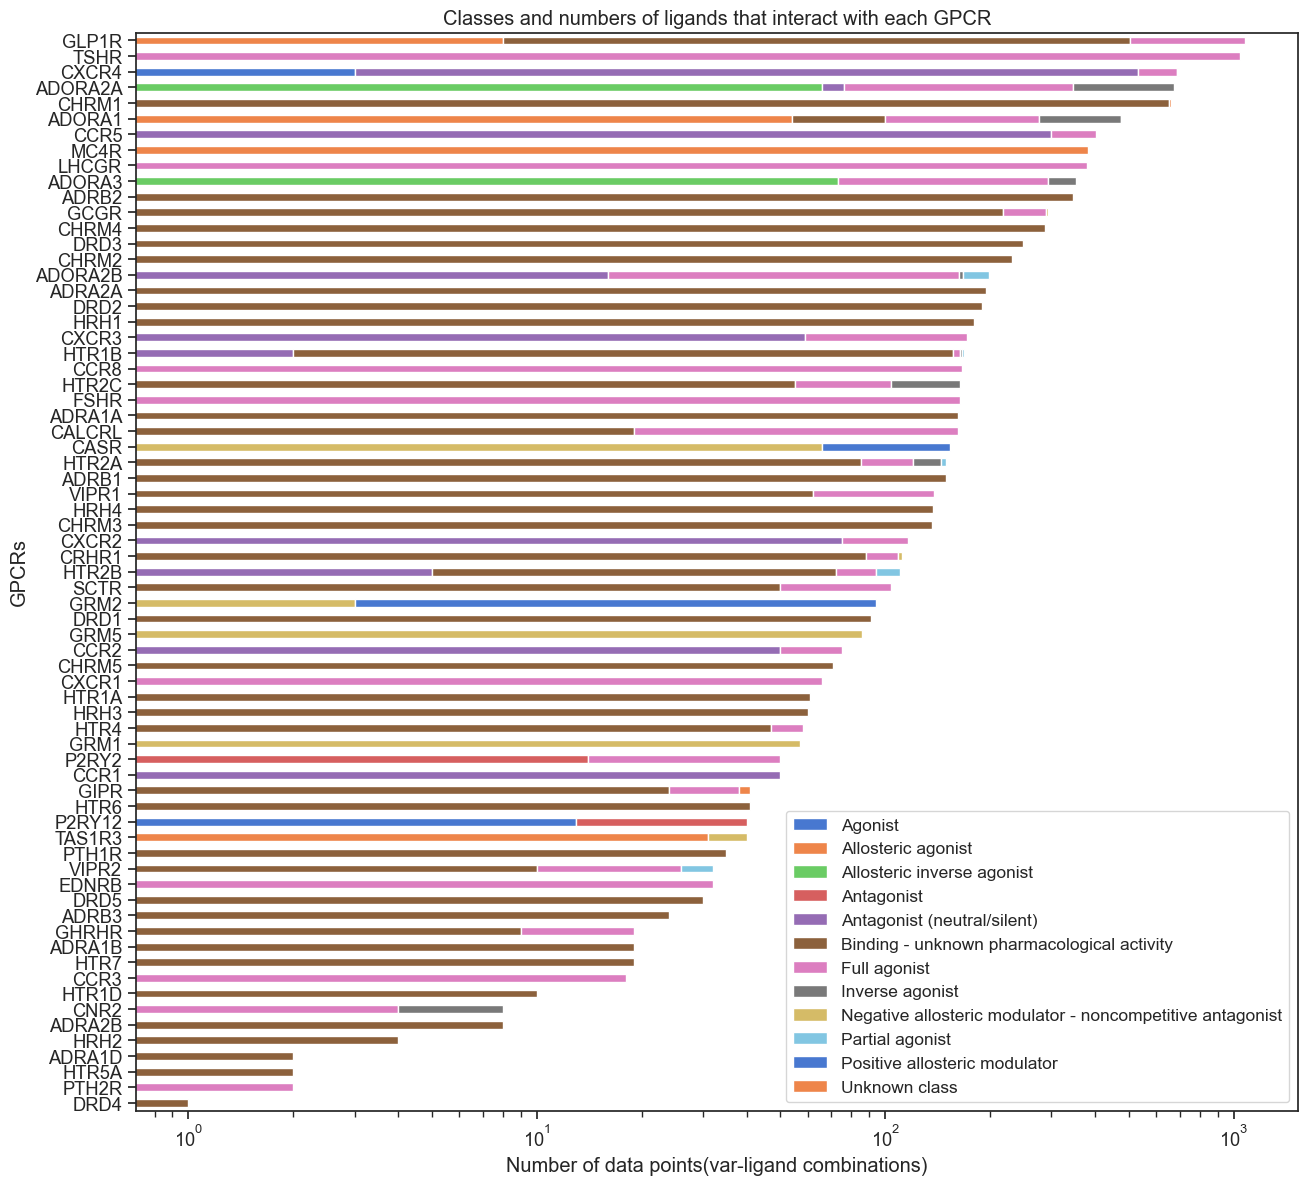

In [1027]:
sns.set_style("ticks")
sns.set_palette("muted")
sns.set_context("notebook", font_scale=1.2)
# create stacked bar chart for monthly temperatures
ax = stat_df.plot(kind='barh', stacked=True, figsize=(15, 14))
ax.set_xscale('log')
 
# labels for x & y axis
plt.ylabel('GPCRs')


plt.xlabel('Number of data points(var-ligand combinations)')

# plt.legend(fontsize=12, loc='center left', bbox_to_anchor=(1.0, 0.875))
plt.legend(fontsize=12.5,loc='lower right')

# title of plot
plt.title('Classes and numbers of ligands that interact with each GPCR')

In [104]:
stat_ligand.to_csv('protein_ligandclass.csv',index=False)

### for each protein, plot the distribution of foldchanges values of different classes of ligand

In [32]:
protein_list = np.unique(gpcr_ori['protein'].tolist())
protein_list

array(['5ht1a_human', '5ht1b_human', '5ht1d_human', '5ht2a_human',
       '5ht2b_human', '5ht2c_human', '5ht4r_human', '5ht5a_human',
       '5ht6r_human', '5ht7r_human', 'aa1r_human', 'aa2ar_human',
       'aa2br_human', 'aa3r_human', 'acm1_human', 'acm2_human',
       'acm3_human', 'acm4_human', 'acm5_human', 'ada1a_human',
       'ada1b_human', 'ada1d_human', 'ada2a_human', 'ada2b_human',
       'adrb1_human', 'adrb2_human', 'adrb3_human', 'calrl_human',
       'casr_human', 'ccr1_human', 'ccr2_human', 'ccr3_human',
       'ccr5_human', 'ccr8_human', 'cnr2_human', 'crfr1_human',
       'cxcr1_human', 'cxcr2_human', 'cxcr3_human', 'cxcr4_human',
       'drd1_human', 'drd2_human', 'drd3_human', 'drd4_human',
       'drd5_human', 'ednrb_human', 'fshr_human', 'ghrhr_human',
       'gipr_human', 'glp1r_human', 'glr_human', 'grm1_human',
       'grm2_human', 'grm5_human', 'hrh1_human', 'hrh2_human',
       'hrh3_human', 'hrh4_human', 'lshr_human', 'mc4r_human',
       'p2ry2_human', 'p2y1

In [ ]:

for prot in protein_list:
    p_data = gpcr_ori[gpcr_ori['protein']==prot][['ligand_class','exp_fold_change']]
    p_data['log_abs_foldchange'] = np.log10(np.abs(p_data['exp_fold_change']))
    p_data = p_data.fillna('Unknown class')

    # replace infs with a valid value (e.g. 5000)
    # p_data.loc[p_data['exp_fold_change'] > 5000, 'exp_fold_change'] = 5000


    class_list = p_data['ligand_class'].value_counts().index.tolist()
    # create a new figure with a larger size
    fig, ax = plt.subplots(figsize=(10, 6))
    ax = sns.violinplot(data=p_data, x="log_abs_foldchange", y="ligand_class", kind="kde",order = class_list)
    nums = p_data['ligand_class'].value_counts().values.tolist()
    # set the tick labels as the combination of class name and sample size
    yticklabels = [f"{class_name}\nn={nums[i]}" for i, class_name in enumerate(class_list)]
    plt.yticks(range(len(class_list)), yticklabels)

    # set plot title and axis labels
    plt.title(f"Distribution of fold change values for different ligand classes - {prot}")
    plt.xlabel("log10_abs(Foldchange values)")
    plt.tight_layout()

    plt.savefig(f'distribution_fc/{prot}.png')
  
    plt.show()   



## boxplot- foldchange distribution, functional annotation


In [656]:
gpcr_anno_raw = pd.read_csv('201012_all_GPCR_residues_annotated.csv')

# drop duplicates based on all columns
gpcr_anno_raw = gpcr_anno_raw.drop_duplicates(subset=['EntryName','WTaa','SequenceNumber'])


gpcr_anno_func = gpcr_anno_raw[gpcr_anno_raw['func_known']==True]
gpcr_anno_not_func = gpcr_anno_raw[gpcr_anno_raw['func_known']==False]


/Users/joannahench/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (12,13,14,15,16,17,18) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [923]:
np.unique(gpcr_anno_raw['Segment'].tolist())

array(['C-term', 'ECL1', 'ECL2', 'ECL3', 'H8', 'ICL1', 'ICL2', 'ICL3',
       'ICL4', 'N-term', 'TM1', 'TM2', 'TM3', 'TM4', 'TM5', 'TM6', 'TM7'],
      dtype='<U6')

In [657]:
nofunc_df= gpcr_anno_not_func[['EntryName','Family','WTaa','SequenceNumber']]
nofunc_df['func_anno'] = 'func_unknown'
nofunc_df

/var/folders/d_/0pdh465d0yj2_tbpjd8dr11c0000gn/T/ipykernel_25299/1242068558.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nofunc_df['func_anno'] = 'func_unknown'


,EntryName,Family,WTaa,SequenceNumber,func_anno
0,5ht1a_human,5-Hydroxytryptamine receptors,M,1,func_unknown
1,5ht1a_human,5-Hydroxytryptamine receptors,D,2,func_unknown
2,5ht1a_human,5-Hydroxytryptamine receptors,V,3,func_unknown
3,5ht1a_human,5-Hydroxytryptamine receptors,L,4,func_unknown
4,5ht1a_human,5-Hydroxytryptamine receptors,S,5,func_unknown
...,...,...,...,...,...
206015,gp157_human,Other GPCR orphans,G,330,func_unknown
206016,gp157_human,Other GPCR orphans,E,331,func_unknown
206017,gp157_human,Other GPCR orphans,L,332,func_unknown
206018,gp157_human,Other GPCR orphans,P,333,func_unknown


In [658]:
func_anno = gpcr_anno_func[['EntryName','Family','WTaa','SequenceNumber','PTMsite','LB_fam','LB_structure_human','GProteinInteraction','ActivationPathway','SodiumPocket','MicroSwitch']]
func_anno

,EntryName,Family,WTaa,SequenceNumber,PTMsite,LB_fam,LB_structure_human,GProteinInteraction,ActivationPathway,SodiumPocket,MicroSwitch
53,5ht1a_human,5-Hydroxytryptamine receptors,N,54,NaN,NaN,NaN,NaN,NaN,yes,NaN
56,5ht1a_human,5-Hydroxytryptamine receptors,V,57,NaN,NaN,NaN,NaN,NaN,yes,NaN
70,5ht1a_human,5-Hydroxytryptamine receptors,A,71,NaN,NaN,NaN,putative,NaN,NaN,NaN
71,5ht1a_human,5-Hydroxytryptamine receptors,N,72,NaN,NaN,NaN,putative,NaN,NaN,NaN
77,5ht1a_human,5-Hydroxytryptamine receptors,L,78,NaN,NaN,NaN,NaN,NaN,yes,NaN
...,...,...,...,...,...,...,...,...,...,...,...
205916,gp157_human,Other GPCR orphans,P,231,NaN,NaN,NaN,NaN,NaN,NaN,yes
205960,gp157_human,Other GPCR orphans,N,275,NaN,NaN,NaN,NaN,NaN,yes,yes
206010,gp157_human,Other GPCR orphans,S,325,yes,NaN,NaN,NaN,NaN,NaN,NaN
206013,gp157_human,Other GPCR orphans,T,328,yes,NaN,NaN,NaN,NaN,NaN,NaN


In [659]:
# melt the dataframe to "long" format
func_df = pd.melt(func_anno, id_vars=['EntryName','Family', 'WTaa','SequenceNumber'], var_name='func_anno', value_name='func_anno_status')

# drop any rows with missing values
func_df = func_df.dropna()

print(func_df)

          EntryName                         Family WTaa  SequenceNumber  \
35      5ht1a_human  5-Hydroxytryptamine receptors    T             196   
36      5ht1a_human  5-Hydroxytryptamine receptors    S             199   
40      5ht1a_human  5-Hydroxytryptamine receptors    Y             205   
42      5ht1a_human  5-Hydroxytryptamine receptors    Y             215   
52      5ht1a_human  5-Hydroxytryptamine receptors    T             240   
...             ...                            ...  ...             ...   
158311  gp143_human             Other GPCR orphans    P             201   
158313  gp143_human             Other GPCR orphans    W             257   
158314  gp143_human             Other GPCR orphans    Y             311   
158321  gp157_human             Other GPCR orphans    P             231   
158322  gp157_human             Other GPCR orphans    N             275   

          func_anno func_anno_status  
35          PTMsite              yes  
36          PTMsite  

In [660]:
# concat func_df and nofunc_df along rows
anno_df = pd.concat([func_df, nofunc_df], axis=0)
anno_df

,EntryName,Family,WTaa,SequenceNumber,func_anno,func_anno_status
35,5ht1a_human,5-Hydroxytryptamine receptors,T,196,PTMsite,yes
36,5ht1a_human,5-Hydroxytryptamine receptors,S,199,PTMsite,yes
40,5ht1a_human,5-Hydroxytryptamine receptors,Y,205,PTMsite,yes
42,5ht1a_human,5-Hydroxytryptamine receptors,Y,215,PTMsite,yes
52,5ht1a_human,5-Hydroxytryptamine receptors,T,240,PTMsite,yes
...,...,...,...,...,...,...
206015,gp157_human,Other GPCR orphans,G,330,func_unknown,NaN
206016,gp157_human,Other GPCR orphans,E,331,func_unknown,NaN
206017,gp157_human,Other GPCR orphans,L,332,func_unknown,NaN
206018,gp157_human,Other GPCR orphans,P,333,func_unknown,NaN


In [661]:
# rename the columns for merging
anno_df = anno_df.rename(columns={'EntryName': 'protein','WTaa':'mutation_from','SequenceNumber':'mutation_pos'})
anno_df

,protein,Family,mutation_from,mutation_pos,func_anno,func_anno_status
35,5ht1a_human,5-Hydroxytryptamine receptors,T,196,PTMsite,yes
36,5ht1a_human,5-Hydroxytryptamine receptors,S,199,PTMsite,yes
40,5ht1a_human,5-Hydroxytryptamine receptors,Y,205,PTMsite,yes
42,5ht1a_human,5-Hydroxytryptamine receptors,Y,215,PTMsite,yes
52,5ht1a_human,5-Hydroxytryptamine receptors,T,240,PTMsite,yes
...,...,...,...,...,...,...
206015,gp157_human,Other GPCR orphans,G,330,func_unknown,NaN
206016,gp157_human,Other GPCR orphans,E,331,func_unknown,NaN
206017,gp157_human,Other GPCR orphans,L,332,func_unknown,NaN
206018,gp157_human,Other GPCR orphans,P,333,func_unknown,NaN


In [707]:
anno_df.to_csv('processed_func_anno.csv',index=False)

In [1008]:
# merge with foldchange data
anno_with_fc = pd.merge(gpcr_ori,anno_df,on=['protein','mutation_from','mutation_pos'])
anno_with_fc

,Unnamed: 0,reference,protein,mutation_pos,mutation_from,mutation_to,ligand_name,ligand_idtype,ligand_id,ligand_class,...,exp_mu_ligand_ref,opt_receptor_expression,opt_basal_activity,opt_gain_of_activity,opt_ligand_emax,opt_agonist,SYMBOL,Family,func_anno,func_anno_status
0,0,8903934,hrh1_human,194,T,A,(S)-cetirizine,ChEMBL Compound ID,CHEMBL1334217,Binding - unknown pharmacological activity,...,[3H]-mepyramine (radioligand),0.0,0.0,NaN,0.0,NaN,HRH1,Histamine receptors,func_unknown,NaN
1,8,8198587,hrh1_human,194,T,A,2-methylhistamine,ChEMBL Compound ID,CHEMBL12620,Binding - unknown pharmacological activity,...,[3H]-mepyramine (radioligand),126.0,0.0,NaN,0.0,NaN,HRH1,Histamine receptors,func_unknown,NaN
2,12,11809864,hrh1_human,194,T,A,(S)-cetirizine,ChEMBL Compound ID,CHEMBL1334217,Binding - unknown pharmacological activity,...,[3H]-mepyramine (radioligand),24.4,0.0,NaN,0.0,NaN,HRH1,Histamine receptors,func_unknown,NaN
3,19,8093027,hrh1_human,194,T,A,[3H]-mepyramine,ChEMBL Compound ID,CHEMBL511,Binding - unknown pharmacological activity,...,[3H]-mepyramine (radioligand),122.7,0.0,NaN,0.0,NaN,HRH1,Histamine receptors,func_unknown,NaN
4,20,8198587,hrh1_human,194,T,A,Histamine,ChEMBL Compound ID,CHEMBL90,Binding - unknown pharmacological activity,...,[3H]-mepyramine (radioligand),126.0,0.0,NaN,0.0,NaN,HRH1,Histamine receptors,func_unknown,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14829,418,10.1124/mol.63.5.1021,aa3r_human,182,F,A,Cl-IB-MECA,PubChem CID,393593,Full agonist,...,I-AB-MECA,0.0,0.0,=,0.0,NaN,ADORA3,Adenosine receptors,func_unknown,NaN
14830,450,10.1124/mol.63.5.1021,aa3r_human,182,F,A,DU124183,PubChem CID,10426659,Allosteric inverse agonist,...,I-AB-MECA,0.0,0.0,=,0.0,NaN,ADORA3,Adenosine receptors,func_unknown,NaN
14831,130,10.1006/bbrc.2001.5027,aa3r_human,109,Y,F,I-AB-MECA,PubChem CID,44208896,Full agonist,...,NaN,0.0,0.0,=,0.0,NaN,ADORA3,Adenosine receptors,func_unknown,NaN
14832,277,10.1006/bbrc.2001.5027,aa3r_human,109,Y,F,Cl-IB-MECA,PubChem CID,393593,Full agonist,...,NaN,0.0,0.0,=,0.0,NaN,ADORA3,Adenosine receptors,func_unknown,NaN


In [1009]:
p_df = anno_with_fc[['Family','SYMBOL','mutation_from','mutation_pos','mutation_to','exp_fold_change','func_anno','ligand_class']]
p_df['ligand_class'].value_counts()
p_df = p_df.fillna('Unknown')

In [664]:
ligand_list = np.unique(p_df['ligand_class'].tolist())
ligand_list

array(['Agonist', 'Allosteric agonist', 'Allosteric inverse agonist',
       'Antagonist', 'Antagonist (neutral/silent)',
       'Binding - unknown pharmacological activity', 'Full agonist',
       'Inverse agonist',
       'Negative allosteric modulator - noncompetitive antagonist',
       'Partial agonist', 'Positive allosteric modulator', 'Unknown'],
      dtype='<U57')

In [1010]:
func_unknown = ['func_unknown']
LB_structure_human = ['LB_structure_human']
LB_fam = ['LB_fam']
Other_func = ['ActivationPathway','MicroSwitch','PTMsite','SodiumPocket']
Gprotein_interface = ['GProteinInteraction']


merge_class = {'func_unknown': func_unknown, 'LB_structure_human':LB_structure_human,'LB_fam':LB_fam,'Other_func':Other_func,'Gprotein_interface':Gprotein_interface}

# create a function to map classes to new_classes
def map_classes(x):
    for key, value in merge_class.items():
        if x in value:
            return key
    return 'other'

# add new column to dataframe
p_df['functional_site'] = p_df['func_anno'].apply(map_classes)


In [1011]:
p_df['log_abs_foldchange'] = np.log10(abs(p_df['exp_fold_change']))
p_df

,Family,SYMBOL,mutation_from,mutation_pos,mutation_to,exp_fold_change,func_anno,ligand_class,functional_site,log_abs_foldchange
0,Histamine receptors,HRH1,T,194,A,-10.000,func_unknown,Binding - unknown pharmacological activity,func_unknown,1.000000
1,Histamine receptors,HRH1,T,194,A,-1.681,func_unknown,Binding - unknown pharmacological activity,func_unknown,0.225568
2,Histamine receptors,HRH1,T,194,A,-12.658,func_unknown,Binding - unknown pharmacological activity,func_unknown,1.102365
3,Histamine receptors,HRH1,T,194,A,-3.155,func_unknown,Binding - unknown pharmacological activity,func_unknown,0.498999
4,Histamine receptors,HRH1,T,194,A,2.295,func_unknown,Binding - unknown pharmacological activity,func_unknown,0.360783
...,...,...,...,...,...,...,...,...,...,...
14829,Adenosine receptors,ADORA3,F,182,A,2.261,func_unknown,Full agonist,func_unknown,0.354301
14830,Adenosine receptors,ADORA3,F,182,A,2.724,func_unknown,Allosteric inverse agonist,func_unknown,0.435207
14831,Adenosine receptors,ADORA3,Y,109,F,1.667,func_unknown,Full agonist,func_unknown,0.221936
14832,Adenosine receptors,ADORA3,Y,109,F,4.474,func_unknown,Full agonist,func_unknown,0.650696


Boxplot of exp_fold_change by func_anno

In [480]:
pairs = [
    ('func_unknown', 'LB_fam'), ('func_unknown', 'LB_structure_human'),
    ('func_unknown', 'SodiumPocket'), ('func_unknown', 'MicroSwitch'),
    ('func_unknown', 'GProteinInteraction'), ('func_unknown', 'PTMsite'),
    ('func_unknown', 'ActivationPathway')

]

ValueError: box_pairs contains an invalid box pair.

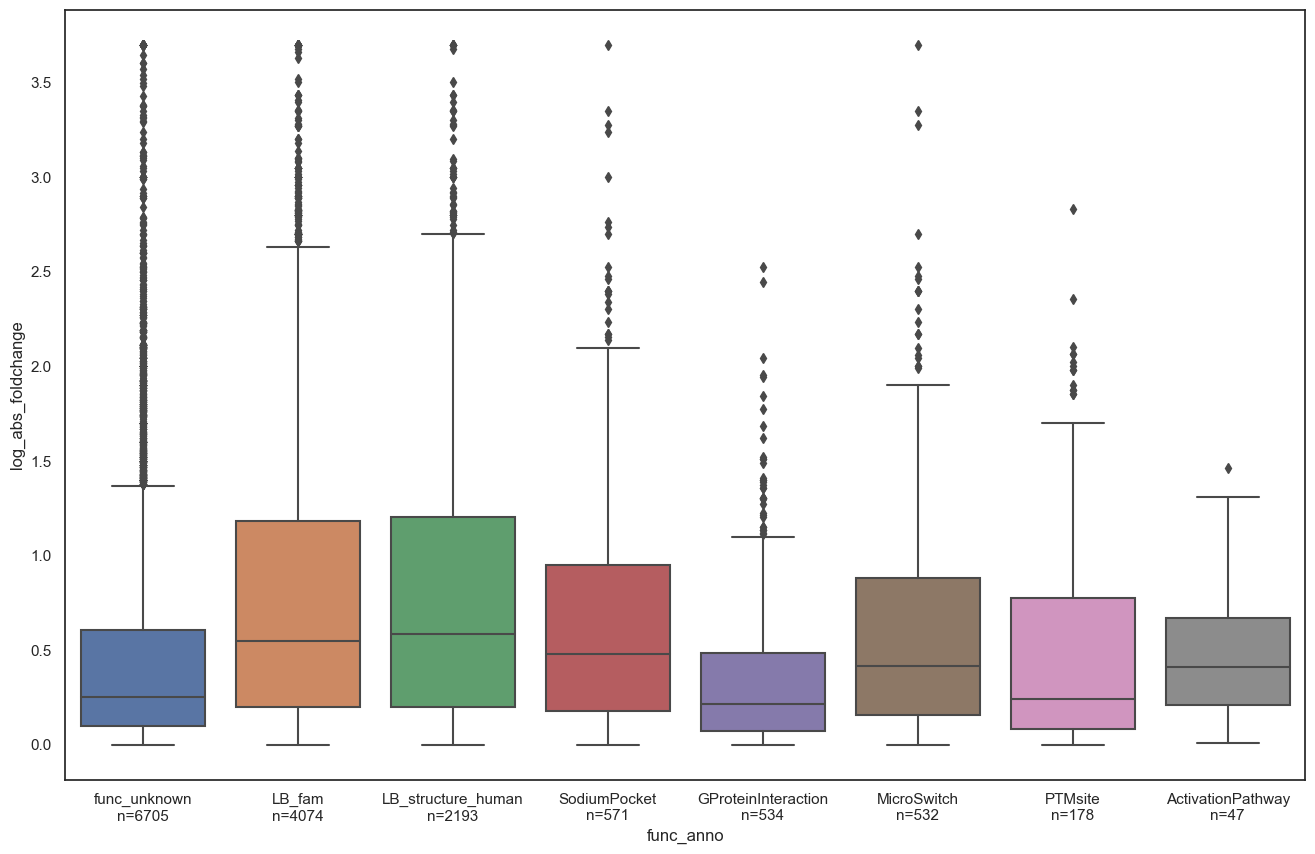

In [796]:



t1 = pd.DataFrame(p_df['func_anno'].value_counts())
# create a new figure with a larger size
fig, ax = plt.subplots(figsize=(16, 10))

# create the boxplot
ax = sns.boxplot(data=p_df, x="func_anno", y="log_abs_foldchange",order=t1.index.tolist(),ax=ax)

# get the maximum y-value for each function annotation
max_value = p_df.groupby(['func_anno'])['exp_fold_change'].max().values

# get the sample size for each function annotation
nobs = p_df['func_anno'].value_counts().values
nobs = [str(x) for x in nobs.tolist()]

# set the tick labels as the combination of class name and sample size
xticklabels = [f"{class_name}\nn={nobs[i]}" for i, class_name in enumerate(t1.index.tolist())]
plt.xticks(range(len(max_value)), xticklabels)


add_stat_annotation(ax, data=p_df, x="func_anno", y="log_abs_foldchange",
                    box_pairs= pairs,
                    test='Mann-Whitney', text_format='simple', loc='inside', verbose=2)

# add a title to the plot
plt.title(f"Boxplot of exp_fold_change by func_anno")

# plt.savefig(f'boxplot_fc_by_function_for_each_ligand/{lig}.png')
# show the plot
plt.show()

Boxplot of exp_fold_change by protein family

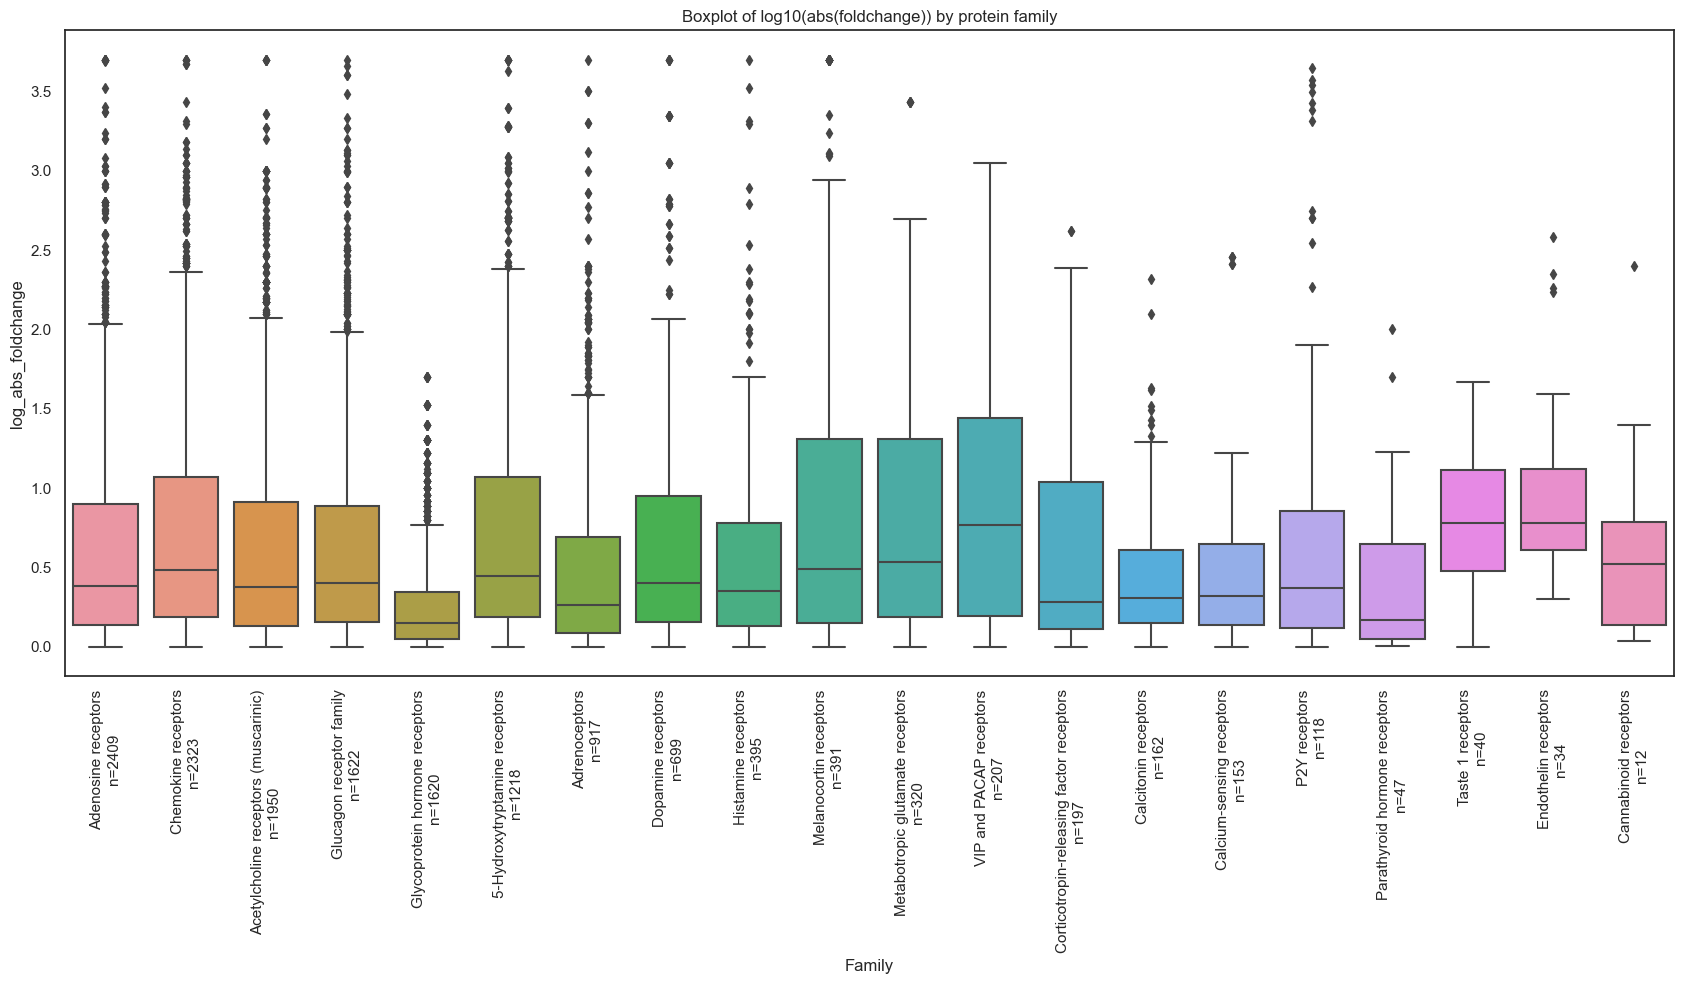

In [933]:

sns.set(style="white")
# create a new figure with a larger size
fig, ax = plt.subplots(figsize=(17, 10))

class_list = p_df['Family'].value_counts().index.tolist()
# create the boxplot
ax = sns.boxplot(data=p_df, x="Family", y="log_abs_foldchange", ax=ax,order=class_list)



# get the sample size for each function annotation
nobs = p_df['Family'].value_counts().values.tolist()


# set the tick labels as the combination of class name and sample size
xticklabels = [f"{class_name}\nn={nobs[i]}" for i, class_name in enumerate(class_list)]
plt.xticks(range(len(class_list)), xticklabels)
plt.xticks(rotation=90)

# add a title to the plot
plt.title(f"Boxplot of log10(abs(foldchange)) by protein family")
plt.tight_layout()
plt.savefig(f'boxplot_fc_by_proteinfam.png')
# show the plot
plt.show()

In [976]:
p_df['protein']

0        hrh1_human
1        hrh1_human
2        hrh1_human
3        hrh1_human
4        hrh1_human
            ...    
14829    aa3r_human
14830    aa3r_human
14831    aa3r_human
14832    aa3r_human
14833    aa3r_human
Name: protein, Length: 14834, dtype: object

Boxplot of exp_fold_change by protein 

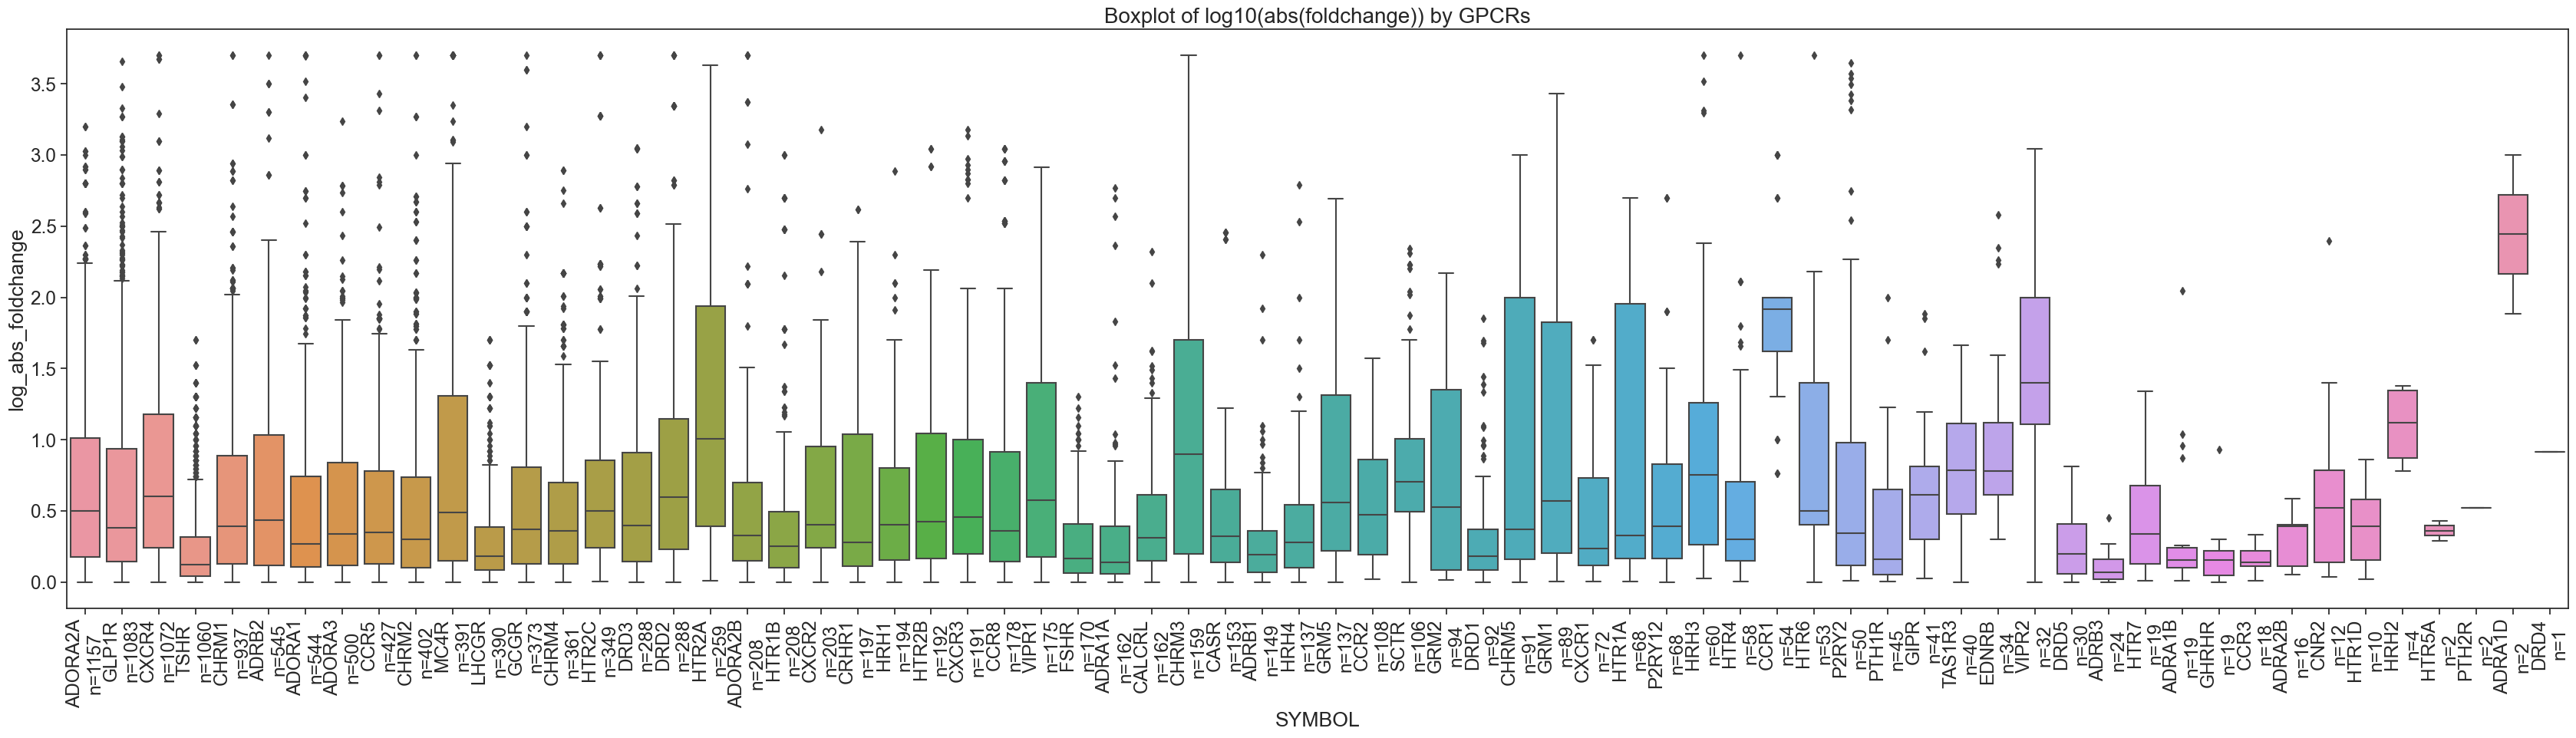

In [1029]:
sns.set_style("ticks")
# sns.set_palette("muted")
sns.set_context("notebook", font_scale=1.6)
t1 = pd.DataFrame(p_df['SYMBOL'].value_counts())

# create a new figure with a larger size
fig, ax = plt.subplots(figsize=(34, 10))

prot_list = p_df['SYMBOL'].value_counts().index.tolist()
# create the boxplot
ax = sns.boxplot(data=p_df, x="SYMBOL", y="log_abs_foldchange", ax=ax,order=prot_list)



# get the sample size for each function annotation
nobs = p_df['SYMBOL'].value_counts().values.tolist()


# set the tick labels as the combination of class name and sample size
xticklabels = [f"{class_name}\nn={nobs[i]}" for i, class_name in enumerate(prot_list)]
plt.xticks(range(len(prot_list)), xticklabels)
plt.xticks(rotation=90)

# add a title to the plot
plt.title(f"Boxplot of log10(abs(foldchange)) by GPCRs",fontsize=20)
plt.tight_layout()
# plt.savefig(f'boxplot_fc_by_protein.png')
# show the plot
plt.show()

### for each ligand class, foldchange boxplot by func_anno

In [ ]:
ligand_list = np.unique(p_df['ligand_class'].tolist())
for lig in ligand_list:
    temp1 = p_df[p_df['ligand_class']==lig]
    
    if lig =='Antagonist (neutral/silent)':
        lig = 'Antagonist (neutral or silent)'
    
    t1 = pd.DataFrame(temp1['func_anno'].value_counts())
    # create a new figure with a larger size
    fig, ax = plt.subplots(figsize=(18, 12))

    # create the boxplot
    ax = sns.boxplot(data=temp1, x="func_anno", y="log_abs_foldchange", ax=ax,order=t1.index.tolist())

    # get the maximum y-value for each function annotation
    max_value = temp1.groupby(['func_anno'])['exp_fold_change'].max().values

    # get the sample size for each function annotation
    nobs = temp1['func_anno'].value_counts().values
    nobs = [str(x) for x in nobs.tolist()]

    # set the tick labels as the combination of class name and sample size
    xticklabels = [f"{class_name}\nn={nobs[i]}" for i, class_name in enumerate(t1.index.tolist())]
    plt.xticks(range(len(max_value)), xticklabels)



    # add a title to the plot
    plt.title(f"Boxplot of exp_fold_change(ligand class = '{lig}') by func_anno")

    plt.savefig(f'boxplot_fc_by_function_for_each_ligand/{lig}.png')
    # show the plot
    plt.show()

### for each func_anno, boxplot foldchange by ligand class

In [ ]:
anno_list = np.unique(p_df['func_anno'].tolist())
for func in anno_list:
    temp1 = p_df[p_df['func_anno']==func]
    # if lig =='Antagonist (neutral/silent)':
    #     lig = 'Antagonist (neutral or silent)'
    # create the boxplot
    t1 = pd.DataFrame(temp1['ligand_class'].value_counts())
    fig, ax = plt.subplots(figsize=(40, 12))
    ax = sns.boxplot(data=temp1, x="ligand_class", y="log_abs_foldchange", ax=ax,order=t1.index.tolist())

    # get the maximum y-value for each function annotation
    max_value = temp1.groupby(['ligand_class'])['exp_fold_change'].max().values

    # get the sample size for each function annotation
    nobs = temp1['ligand_class'].value_counts().values
    nobs = [str(x) for x in nobs.tolist()]

    # set the tick labels as the combination of class name and sample size
    xticklabels = [f"{class_name}\nn={nobs[i]}" for i, class_name in enumerate(t1.index.tolist())]
    plt.xticks(range(len(max_value)), xticklabels)
    # add a title to the plot
    plt.title(f"Boxplot of exp_fold_change(func_anno = '{func}') by ligand_class")

    plt.savefig(f'boxplot_fc_by_ligandclass_for_each_function/{func}.png')
    # show the plot
    plt.show()

In [482]:
ligand_list

array(['Agonist', 'Allosteric agonist', 'Allosteric inverse agonist',
       'Antagonist', 'Antagonist (neutral/silent)',
       'Binding - unknown pharmacological activity', 'Full agonist',
       'Inverse agonist',
       'Negative allosteric modulator - noncompetitive antagonist',
       'Partial agonist', 'Positive allosteric modulator', 'mc4r'],
      dtype='<U57')

## ligand class and func anno into one boxplot

In [1031]:
Agonist_list = ['Agonist','Full agonist','Allosteric agonist','Positive allosteric modulator','Partial agonist']
Antagonist_list = ['Antagonist','Antagonist (neutral/silent)','Negative allosteric modulator - noncompetitive antagonist']
Binding_list = ['Binding - unknown pharmacological activity','Unknown']
Inverse_agonist = ['Inverse agonist','Allosteric inverse agonist']

merge_class = {'Agonist': Agonist_list, 'Antagonist':Antagonist_list,'Binding':Binding_list,'Inverse agonist':Inverse_agonist}
# create a function to map classes to new_classes
def map_classes(x):
    for key, value in merge_class.items():
        if x in value:
            return key
    return 'other'

# add new column to dataframe
p_df['ligand type'] = p_df['ligand_class'].apply(map_classes)

# print dataframe
p_df

,Family,SYMBOL,mutation_from,mutation_pos,mutation_to,exp_fold_change,func_anno,ligand_class,functional_site,log_abs_foldchange,ligand type
0,Histamine receptors,HRH1,T,194,A,-10.000,func_unknown,Binding - unknown pharmacological activity,func_unknown,1.000000,Binding
1,Histamine receptors,HRH1,T,194,A,-1.681,func_unknown,Binding - unknown pharmacological activity,func_unknown,0.225568,Binding
2,Histamine receptors,HRH1,T,194,A,-12.658,func_unknown,Binding - unknown pharmacological activity,func_unknown,1.102365,Binding
3,Histamine receptors,HRH1,T,194,A,-3.155,func_unknown,Binding - unknown pharmacological activity,func_unknown,0.498999,Binding
4,Histamine receptors,HRH1,T,194,A,2.295,func_unknown,Binding - unknown pharmacological activity,func_unknown,0.360783,Binding
...,...,...,...,...,...,...,...,...,...,...,...
14829,Adenosine receptors,ADORA3,F,182,A,2.261,func_unknown,Full agonist,func_unknown,0.354301,Agonist
14830,Adenosine receptors,ADORA3,F,182,A,2.724,func_unknown,Allosteric inverse agonist,func_unknown,0.435207,Inverse agonist
14831,Adenosine receptors,ADORA3,Y,109,F,1.667,func_unknown,Full agonist,func_unknown,0.221936,Agonist
14832,Adenosine receptors,ADORA3,Y,109,F,4.474,func_unknown,Full agonist,func_unknown,0.650696,Agonist


In [689]:
p_df1 = p_df[p_df['ligand type']!='other']
p_df1

,Family,protein,mutation_from,mutation_pos,mutation_to,exp_fold_change,func_anno,ligand_class,log_abs_foldchange,new_class,ligand type
0,Histamine receptors,hrh1_human,T,194,A,-10.000,func_unknown,Binding - unknown pharmacological activity,1.000000,Unknown,Unknown
1,Histamine receptors,hrh1_human,T,194,A,-1.681,func_unknown,Binding - unknown pharmacological activity,0.225568,Unknown,Unknown
2,Histamine receptors,hrh1_human,T,194,A,-12.658,func_unknown,Binding - unknown pharmacological activity,1.102365,Unknown,Unknown
3,Histamine receptors,hrh1_human,T,194,A,-3.155,func_unknown,Binding - unknown pharmacological activity,0.498999,Unknown,Unknown
4,Histamine receptors,hrh1_human,T,194,A,2.295,func_unknown,Binding - unknown pharmacological activity,0.360783,Unknown,Unknown
...,...,...,...,...,...,...,...,...,...,...,...
14829,Adenosine receptors,aa3r_human,F,182,A,2.261,func_unknown,Full agonist,0.354301,Agonist,Agonist
14830,Adenosine receptors,aa3r_human,F,182,A,2.724,func_unknown,Allosteric inverse agonist,0.435207,Inverse agonist,Inverse agonist
14831,Adenosine receptors,aa3r_human,Y,109,F,1.667,func_unknown,Full agonist,0.221936,Agonist,Agonist
14832,Adenosine receptors,aa3r_human,Y,109,F,4.474,func_unknown,Full agonist,0.650696,Agonist,Agonist


([<matplotlib.axis.XTick at 0x7fa5306a0d90>,
 [Text(0, 0, 'func_unknown\nn=6705'),
  Text(1, 0, 'LB_fam\nn=4074'),
  Text(2, 0, 'LB_structure_human\nn=2193'),
  Text(3, 0, 'SodiumPocket\nn=571'),
  Text(4, 0, 'GProteinInteraction\nn=534'),
  Text(5, 0, 'MicroSwitch\nn=532'),
  Text(6, 0, 'PTMsite\nn=178'),
  Text(7, 0, 'ActivationPathway\nn=47')])

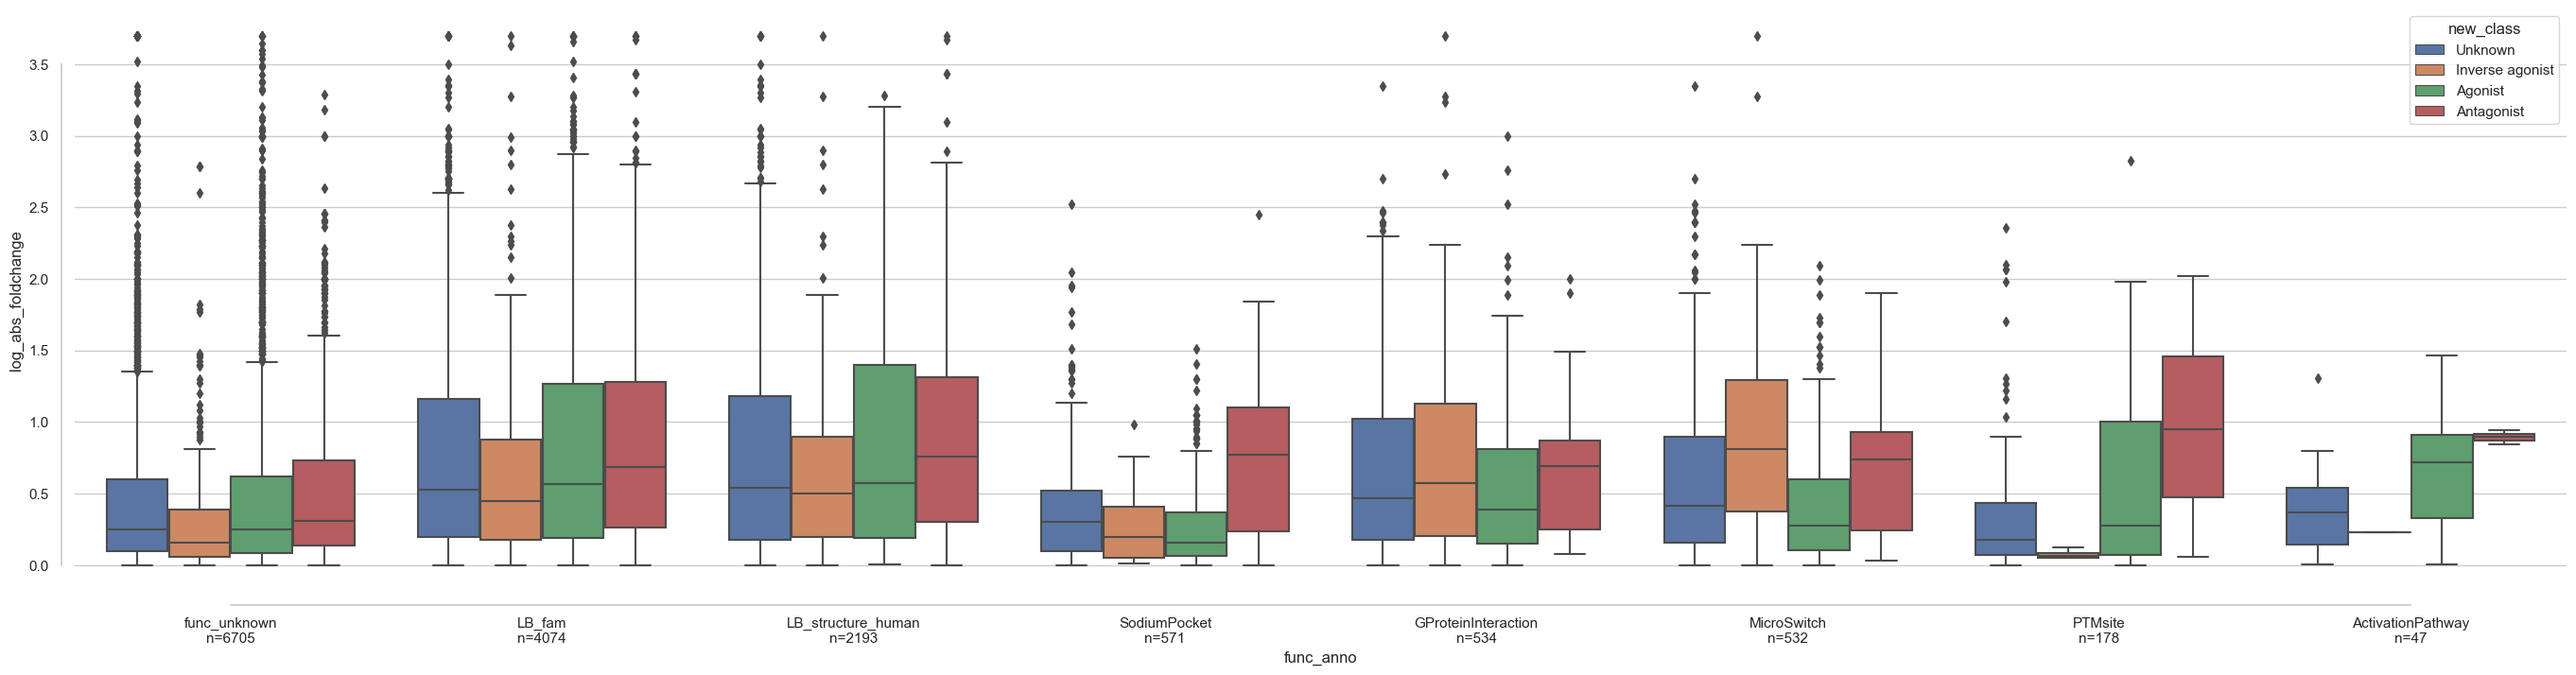

In [690]:
# create a new figure with a larger size
fig, ax = plt.subplots(figsize=(34, 8))

# Draw a nested boxplot to show bills by day and time
sns.boxplot(x="func_anno", y="log_abs_foldchange",
            hue="new_class",
            data=p_df1)
sns.despine(offset=10, trim=True)
t1 = pd.DataFrame(p_df1['func_anno'].value_counts())
# get the maximum y-value for each function annotation
max_value = p_df1.groupby(['func_anno'])['exp_fold_change'].max().values

# get the sample size for each function annotation
nobs = p_df1['func_anno'].value_counts().values
nobs = [str(x) for x in nobs.tolist()]

# set the tick labels as the combination of class name and sample size
xticklabels = [f"{class_name}\nn={nobs[i]}" for i, class_name in enumerate(t1.index.tolist())]
plt.xticks(range(len(max_value)), xticklabels)



### add pvalue

In [428]:
from statannot import add_stat_annotation

In [471]:
pairs = [
    (('func_unknown', 'Binding'), ('func_unknown', 'Agonist')),
    (('LB_fam', 'Binding'), ('LB_fam', 'Agonist')),
    (('LB_structure_human', 'Binding'), ('LB_structure_human', 'Agonist')),
    (('SodiumPocket', 'Binding'), ('SodiumPocket', 'Agonist')),
    (('MicroSwitch', 'Binding'), ('MicroSwitch', 'Agonist')),
    (('GProteinInteraction', 'Binding'), ('GProteinInteraction', 'Agonist')),
    (('PTMsite', 'Binding'), ('PTMsite', 'Agonist')),
    (('ActivationPathway', 'Binding'), ('ActivationPathway', 'Agonist')),

    (('func_unknown', 'Binding'), ('func_unknown', 'Antagonist')),
    (('LB_fam', 'Binding'), ('LB_fam', 'Antagonist')),
    (('LB_structure_human', 'Binding'), ('LB_structure_human', 'Antagonist')),
    (('SodiumPocket', 'Binding'), ('SodiumPocket', 'Antagonist')),
    (('MicroSwitch', 'Binding'), ('MicroSwitch', 'Antagonist')),
    (('GProteinInteraction', 'Binding'), ('GProteinInteraction', 'Antagonist')),
    (('PTMsite', 'Binding'), ('PTMsite', 'Antagonist')),
    (('ActivationPathway', 'Binding'), ('ActivationPathway', 'Antagonist')),


    (('func_unknown', 'Agonist'), ('func_unknown', 'Antagonist')),
    (('LB_fam', 'Agonist'), ('LB_fam', 'Antagonist')),
    (('LB_structure_human', 'Agonist'), ('LB_structure_human', 'Antagonist')),
    (('SodiumPocket', 'Agonist'), ('SodiumPocket', 'Antagonist')),
    (('MicroSwitch', 'Agonist'), ('MicroSwitch', 'Antagonist')),
    (('GProteinInteraction', 'Agonist'), ('GProteinInteraction', 'Antagonist')),
    (('PTMsite', 'Agonist'), ('PTMsite', 'Antagonist')),
    (('ActivationPathway', 'Agonist'), ('ActivationPathway', 'Antagonist'))
    


]

In [469]:
pairs = [
    (('LB_fam', 'Agonist'), ('func_unknown', 'Agonist')),
    (('LB_fam', 'Agonist'), ('LB_structure_human', 'Agonist')),
    (('LB_fam', 'Agonist'), ('SodiumPocket', 'Agonist')),
    (('LB_fam', 'Agonist'), ('MicroSwitch', 'Agonist')),
    (('LB_fam', 'Agonist'), ('GProteinInteraction', 'Agonist')),
    (('LB_fam', 'Agonist'), ('PTMsite', 'Agonist')),
    (('LB_fam', 'Agonist'), ('ActivationPathway', 'Agonist')),

    (('LB_structure_human', 'Agonist'), ('func_unknown', 'Agonist')),
    (('LB_structure_human', 'Agonist'), ('LB_fam', 'Agonist')),
    (('LB_structure_human', 'Agonist'), ('SodiumPocket', 'Agonist')),
    (('LB_structure_human', 'Agonist'), ('MicroSwitch', 'Agonist')),
    (('LB_structure_human', 'Agonist'), ('GProteinInteraction', 'Agonist')),
    (('LB_structure_human', 'Agonist'), ('PTMsite', 'Agonist')),
    (('LB_structure_human', 'Agonist'), ('ActivationPathway', 'Agonist'))


    # (('func_unknown', 'Binding'), ('func_unknown', 'Antagonist')),
    # (('LB_fam', 'Binding'), ('LB_fam', 'Antagonist')),
    # (('LB_structure_human', 'Binding'), ('LB_structure_human', 'Antagonist')),
    # (('SodiumPocket', 'Binding'), ('SodiumPocket', 'Antagonist')),
    # (('MicroSwitch', 'Binding'), ('MicroSwitch', 'Antagonist')),
    # (('GProteinInteraction', 'Binding'), ('GProteinInteraction', 'Antagonist')),
    # (('PTMsite', 'Binding'), ('PTMsite', 'Antagonist')),
    # (('ActivationPathway', 'Binding'), ('ActivationPathway', 'Antagonist')),


    # (('func_unknown', 'Agonist'), ('func_unknown', 'Antagonist')),
    # (('LB_fam', 'Agonist'), ('LB_fam', 'Antagonist')),
    # (('LB_structure_human', 'Agonist'), ('LB_structure_human', 'Antagonist')),
    # (('SodiumPocket', 'Agonist'), ('SodiumPocket', 'Antagonist')),
    # (('MicroSwitch', 'Agonist'), ('MicroSwitch', 'Antagonist')),
    # (('GProteinInteraction', 'Agonist'), ('GProteinInteraction', 'Antagonist')),
    # (('PTMsite', 'Agonist'), ('PTMsite', 'Antagonist')),
    # (('ActivationPathway', 'Agonist'), ('ActivationPathway', 'Antagonist'))
    


]

In [829]:
p_df

,Family,protein,mutation_from,mutation_pos,mutation_to,exp_fold_change,func_anno,ligand_class,log_abs_foldchange,new_class,ligand type,functional_site,dabest_group
0,Histamine receptors,hrh1_human,T,194,A,-10.000,func_unknown,Binding - unknown pharmacological activity,1.000000,Unknown,Binding,func_unknown,func_unknown+Unknown
1,Histamine receptors,hrh1_human,T,194,A,-1.681,func_unknown,Binding - unknown pharmacological activity,0.225568,Unknown,Binding,func_unknown,func_unknown+Unknown
2,Histamine receptors,hrh1_human,T,194,A,-12.658,func_unknown,Binding - unknown pharmacological activity,1.102365,Unknown,Binding,func_unknown,func_unknown+Unknown
3,Histamine receptors,hrh1_human,T,194,A,-3.155,func_unknown,Binding - unknown pharmacological activity,0.498999,Unknown,Binding,func_unknown,func_unknown+Unknown
4,Histamine receptors,hrh1_human,T,194,A,2.295,func_unknown,Binding - unknown pharmacological activity,0.360783,Unknown,Binding,func_unknown,func_unknown+Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14829,Adenosine receptors,aa3r_human,F,182,A,2.261,func_unknown,Full agonist,0.354301,Agonist,Agonist,func_unknown,func_unknown+Agonist
14830,Adenosine receptors,aa3r_human,F,182,A,2.724,func_unknown,Allosteric inverse agonist,0.435207,Inverse agonist,Inverse agonist,func_unknown,func_unknown+Inverse agonist
14831,Adenosine receptors,aa3r_human,Y,109,F,1.667,func_unknown,Full agonist,0.221936,Agonist,Agonist,func_unknown,func_unknown+Agonist
14832,Adenosine receptors,aa3r_human,Y,109,F,4.474,func_unknown,Full agonist,0.650696,Agonist,Agonist,func_unknown,func_unknown+Agonist


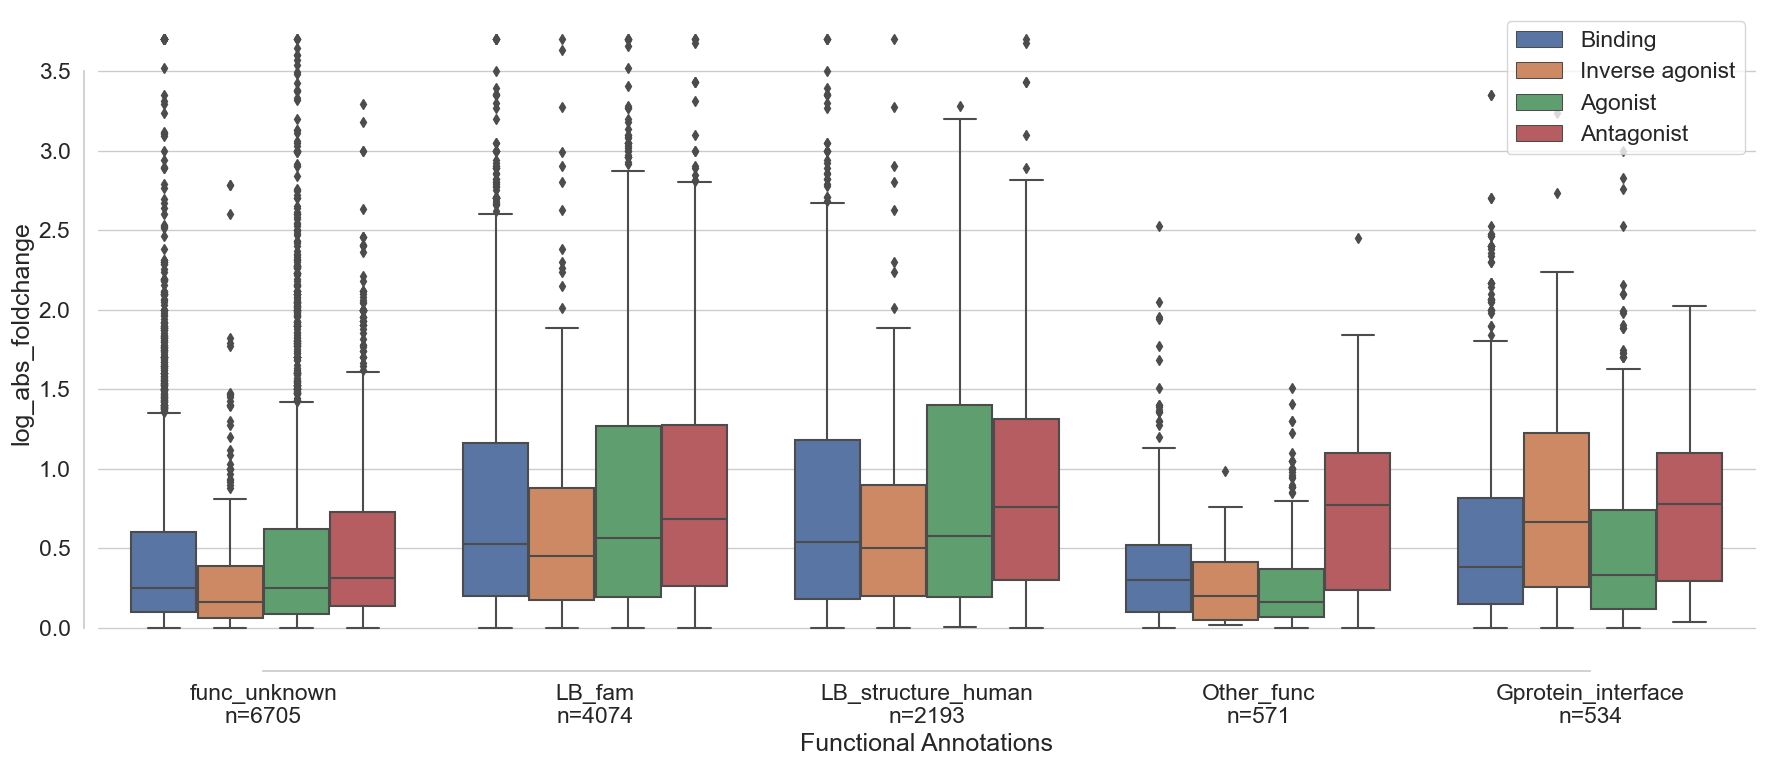

In [1033]:
# sns.set(style="whitegrid")
sns.set_style("whitegrid")
# sns.set_palette("muted")
sns.set_context("notebook", font_scale=1.5)
# create a new figure with a larger size
fig, ax = plt.subplots(figsize=(18, 8))

# Draw a nested boxplot to show bills by day and time
ax = sns.boxplot(x="functional_site", y="log_abs_foldchange",
            hue="ligand type",
            data=p_df)
sns.despine(offset=10, trim=True)
plt.xlabel('Functional Annotations')   
t1 = pd.DataFrame(p_df['functional_site'].value_counts())
# get the maximum y-value for each function annotation
max_value = p_df.groupby(['functional_site'])['exp_fold_change'].max().values

# get the sample size for each function annotation
nobs = p_df['func_anno'].value_counts().values
nobs = [str(x) for x in nobs.tolist()]

# set the tick labels as the combination of class name and sample size
xticklabels = [f"{class_name}\nn={nobs[i]}" for i, class_name in enumerate(t1.index.tolist())]
plt.xticks(range(len(max_value)), xticklabels)


# add_stat_annotation(ax, data=p_df1, x="func_anno", y="log_abs_foldchange",hue="new_class",
#                     box_pairs= pairs,
#                     test='Mann-Whitney', text_format='simple', loc='inside', verbose=2)

plt.legend(loc='upper right')
plt.tight_layout()
# plt.savefig('grouped_box_merge.png')
# show the plot
plt.show()


### for each ligand class, fc by func_anno

In [ ]:
pairs = [
    ('func_unknown', 'LB_fam'), ('func_unknown', 'LB_structure_human'),
    ('func_unknown', 'SodiumPocket'), ('func_unknown', 'MicroSwitch'),
    ('func_unknown', 'GProteinInteraction'), ('func_unknown', 'PTMsite'),
    ('func_unknown', 'ActivationPathway')

]

In [ ]:
ligand_list = np.unique(p_df['ligand type'].tolist())
for lig in ligand_list:
    temp1 = p_df[p_df['ligand type']==lig]
    
    
    # t1 = pd.DataFrame(temp1['func_anno'].value_counts())
    func_list = temp1['func_anno'].value_counts().index.tolist()
    # create a new figure with a larger size
    fig, ax = plt.subplots(figsize=(18, 12))

    # create the boxplot
    ax = sns.boxplot(data=temp1, x="func_anno", y="log_abs_foldchange", ax=ax,order=func_list)
    nobs = temp1['func_anno'].value_counts().values.tolist()


    # set the tick labels as the combination of class name and sample size
    xticklabels = [f"{class_name}\nn={nobs[i]}" for i, class_name in enumerate(func_list)]
    plt.xticks(range(len(nobs)), xticklabels)


    # add a title to the plot
    plt.title(f"Boxplot of exp_fold_change(ligand class = '{lig}') by func_anno")

    plt.savefig(f'boxplot_fc_by_function_for_each_ligand/{lig}.png')
    # show the plot
    plt.show()

# use dabest

In [797]:
import dabest

print("We're using DABEST v{}".format(dabest.__version__))

We're using DABEST v2023.02.14


In [685]:
p_df

,Family,protein,mutation_from,mutation_pos,mutation_to,exp_fold_change,func_anno,ligand_class,log_abs_foldchange,new_class
0,Histamine receptors,hrh1_human,T,194,A,-10.000,func_unknown,Binding - unknown pharmacological activity,1.000000,Unknown
1,Histamine receptors,hrh1_human,T,194,A,-1.681,func_unknown,Binding - unknown pharmacological activity,0.225568,Unknown
2,Histamine receptors,hrh1_human,T,194,A,-12.658,func_unknown,Binding - unknown pharmacological activity,1.102365,Unknown
3,Histamine receptors,hrh1_human,T,194,A,-3.155,func_unknown,Binding - unknown pharmacological activity,0.498999,Unknown
4,Histamine receptors,hrh1_human,T,194,A,2.295,func_unknown,Binding - unknown pharmacological activity,0.360783,Unknown
...,...,...,...,...,...,...,...,...,...,...
14829,Adenosine receptors,aa3r_human,F,182,A,2.261,func_unknown,Full agonist,0.354301,Agonist
14830,Adenosine receptors,aa3r_human,F,182,A,2.724,func_unknown,Allosteric inverse agonist,0.435207,Inverse agonist
14831,Adenosine receptors,aa3r_human,Y,109,F,1.667,func_unknown,Full agonist,0.221936,Agonist
14832,Adenosine receptors,aa3r_human,Y,109,F,4.474,func_unknown,Full agonist,0.650696,Agonist


In [822]:
  analysis_of_long_df = dabest.load(p_df, idx=("func_unknown",'LB_fam','LB_structure_human','Other_func','Gprotein_interface'),
                                   x="functional_site", y="log_abs_foldchange")

  analysis_of_long_df

DABEST v2023.02.14
                  
Good afternoon!
The current time is Wed May  3 16:35:26 2023.

Effect size(s) with 95% confidence intervals will be computed for:
1. LB_fam minus func_unknown
2. LB_structure_human minus func_unknown
3. Other_func minus func_unknown
4. Gprotein_interface minus func_unknown

5000 resamples will be used to generate the effect size bootstraps.

/Users/joannahench/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 79.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/joannahench/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 62.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/joannahench/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 42.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/joannahench/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 35.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/joannahench/opt/anaconda3

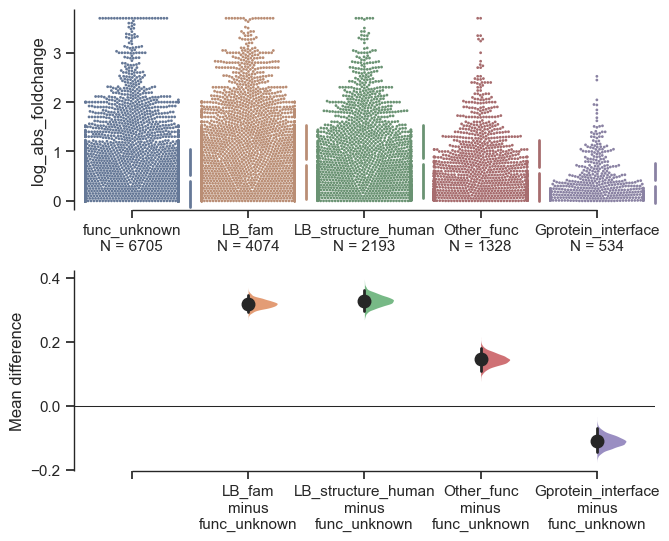

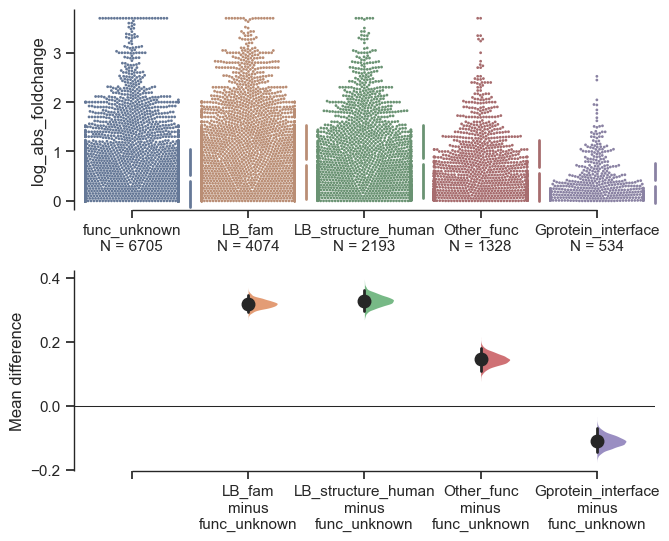

In [959]:
# import matplotlib as mpl
# mpl.rcParams.update(mpl.rcParamsDefault)
analysis_of_long_df.mean_diff.plot(raw_marker_size=2)

In [939]:
analysis_of_long_df.mean_diff

DABEST v2023.02.14
                  
Good afternoon!
The current time is Wed May  3 16:35:56 2023.

The unpaired mean difference between func_unknown and LB_fam is 0.319 [95%CI 0.293, 0.347].
The p-value of the two-sided permutation t-test is 0.0, calculated for legacy purposes only. 

The unpaired mean difference between func_unknown and LB_structure_human is 0.329 [95%CI 0.296, 0.363].
The p-value of the two-sided permutation t-test is 0.0, calculated for legacy purposes only. 

The unpaired mean difference between func_unknown and Other_func is 0.145 [95%CI 0.109, 0.181].
The p-value of the two-sided permutation t-test is 0.0, calculated for legacy purposes only. 

The unpaired mean difference between func_unknown and Gprotein_interface is -0.111 [95%CI -0.145, -0.0709].
The p-value of the two-sided permutation t-test is 0.0, calculated for legacy purposes only. 

5000 bootstrap samples were taken; the confidence interval is bias-corrected and accelerated.
Any p-value reported is t

In [800]:
p_df['dabest_group'] = p_df['func_anno'] +'+'+ p_df['new_class']
p_df

,Family,protein,mutation_from,mutation_pos,mutation_to,exp_fold_change,func_anno,ligand_class,log_abs_foldchange,new_class,ligand type,functional_site,dabest_group
0,Histamine receptors,hrh1_human,T,194,A,-10.000,func_unknown,Binding - unknown pharmacological activity,1.000000,Unknown,Unknown,func_unknown,func_unknown+Unknown
1,Histamine receptors,hrh1_human,T,194,A,-1.681,func_unknown,Binding - unknown pharmacological activity,0.225568,Unknown,Unknown,func_unknown,func_unknown+Unknown
2,Histamine receptors,hrh1_human,T,194,A,-12.658,func_unknown,Binding - unknown pharmacological activity,1.102365,Unknown,Unknown,func_unknown,func_unknown+Unknown
3,Histamine receptors,hrh1_human,T,194,A,-3.155,func_unknown,Binding - unknown pharmacological activity,0.498999,Unknown,Unknown,func_unknown,func_unknown+Unknown
4,Histamine receptors,hrh1_human,T,194,A,2.295,func_unknown,Binding - unknown pharmacological activity,0.360783,Unknown,Unknown,func_unknown,func_unknown+Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14829,Adenosine receptors,aa3r_human,F,182,A,2.261,func_unknown,Full agonist,0.354301,Agonist,Agonist,func_unknown,func_unknown+Agonist
14830,Adenosine receptors,aa3r_human,F,182,A,2.724,func_unknown,Allosteric inverse agonist,0.435207,Inverse agonist,Inverse agonist,func_unknown,func_unknown+Inverse agonist
14831,Adenosine receptors,aa3r_human,Y,109,F,1.667,func_unknown,Full agonist,0.221936,Agonist,Agonist,func_unknown,func_unknown+Agonist
14832,Adenosine receptors,aa3r_human,Y,109,F,4.474,func_unknown,Full agonist,0.650696,Agonist,Agonist,func_unknown,func_unknown+Agonist


In [880]:
temp1

,Family,protein,mutation_from,mutation_pos,mutation_to,exp_fold_change,func_anno,ligand_class,log_abs_foldchange,new_class,ligand type,functional_site,dabest_group
57,Histamine receptors,hrh1_human,I,420,E,-5.000,GProteinInteraction,Binding - unknown pharmacological activity,0.698970,Unknown,Binding,Gprotein_interface,GProteinInteraction+Unknown
58,Histamine receptors,hrh1_human,I,420,A,-1.585,GProteinInteraction,Binding - unknown pharmacological activity,0.200029,Unknown,Binding,Gprotein_interface,GProteinInteraction+Unknown
59,Histamine receptors,hrh1_human,I,420,F,-1.259,GProteinInteraction,Binding - unknown pharmacological activity,0.100026,Unknown,Binding,Gprotein_interface,GProteinInteraction+Unknown
60,Histamine receptors,hrh1_human,I,420,E,1.259,GProteinInteraction,Binding - unknown pharmacological activity,0.100026,Unknown,Binding,Gprotein_interface,GProteinInteraction+Unknown
61,Histamine receptors,hrh1_human,I,420,K,-25.000,GProteinInteraction,Binding - unknown pharmacological activity,1.397940,Unknown,Binding,Gprotein_interface,GProteinInteraction+Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14631,Adenosine receptors,aa3r_human,R,108,K,-2.786,GProteinInteraction,Full agonist,0.444981,Agonist,Agonist,Gprotein_interface,GProteinInteraction+Agonist
14633,Adenosine receptors,aa3r_human,R,108,K,-1.263,GProteinInteraction,Full agonist,0.101403,Agonist,Agonist,Gprotein_interface,GProteinInteraction+Agonist
14635,Adenosine receptors,aa3r_human,R,108,E,1.421,GProteinInteraction,Full agonist,0.152594,Agonist,Agonist,Gprotein_interface,GProteinInteraction+Agonist
14637,Adenosine receptors,aa3r_human,R,108,A,-4.219,GProteinInteraction,Full agonist,0.625210,Agonist,Agonist,Gprotein_interface,GProteinInteraction+Agonist


/Users/joannahench/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 47.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/joannahench/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 65.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


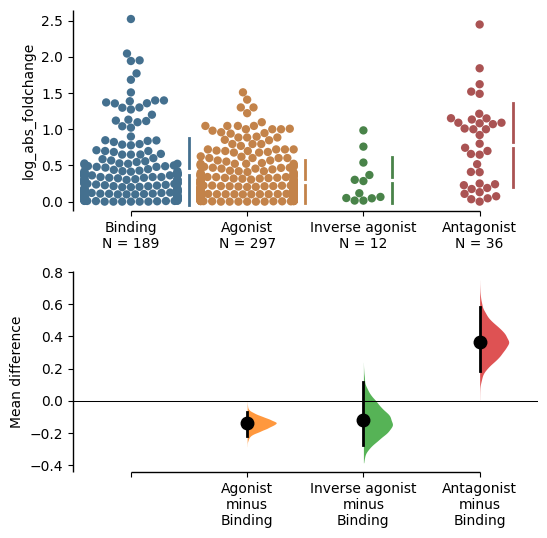

In [888]:

anno_list = np.unique(p_df['func_anno'].tolist())
func = anno_list[1]
# for func in anno_list:
temp1 = p_df[p_df['func_anno']==func]
long1 = dabest.load(temp1, idx=("Binding",'Agonist','Inverse agonist', 'Antagonist'),
                            x="ligand type", y="log_abs_foldchange")
long1.mean_diff.plot().savefig('x.png')
                                


for each GPCR make sns.boxplots

In [ ]:
sns.set(font_scale=1.3)
for prot in protein_list[0]:
    mlgb = gpcr_ori[(gpcr_ori['protein'] == prot)]
    # mlgb['abs_foldchange'] = np.abs(mlgb['exp_fold_change'])
    mlgb['log_abs_foldchange'] = np.log10(np.abs(mlgb['exp_fold_change']))

    mut_pos_max = pd.DataFrame(mlgb.groupby(by=["mutation_pos","mutation_from"]).max()[['log_abs_foldchange']].values,columns=['log_abs_foldchange'])
    mut_pos_max['label']='mutation positions'
    ligand_max = pd.DataFrame(mlgb.groupby(by=["ligand_name"]).max()[['log_abs_foldchange']].values,columns=['log_abs_foldchange'])
    ligand_max['label']='ligands'
    mlgb_df_max = pd.concat([mut_pos_max,ligand_max],axis=0)

    mut_pos_mean = pd.DataFrame(mlgb.groupby(by=["mutation_pos","mutation_from"]).mean()[['log_abs_foldchange']].values,columns=['log_abs_foldchange'])
    mut_pos_mean['label']='mutation positions'
    ligand_mean = pd.DataFrame(mlgb.groupby(by=["ligand_name"]).mean()[['log_abs_foldchange']].values,columns=['log_abs_foldchange'])
    ligand_mean['label']='ligands'
    mlgb_df_mean = pd.concat([mut_pos_mean,ligand_mean],axis=0)
    


    # Create a figure with two subplots
    fig, axes = plt.subplots(ncols=2, figsize=(12, 6))
    # set colors
    # my_pal = {"mutation positions": sns.color_palette("Pastel1")[0], "ligands": sns.color_palette("Pastel2")[0]}
    my_pal = {"mutation positions": 'pink', "ligands": 'paleturquoise'}

    #make boxplot with weltch test
    pairs = [('mutation positions', 'ligands')]   

    sns.violinplot(data = mlgb_df_max,x="label", y='log_abs_foldchange',ax=axes[0],inner=None,palette=my_pal,linewidth=0,saturation=0.4)
    sns.boxplot(data = mlgb_df_max,x="label", y='log_abs_foldchange',ax=axes[0],palette=my_pal, width=0.2,boxprops={'zorder': 2})



    add_stat_annotation(axes[0], data=mlgb_df_max, x="label", y='log_abs_foldchange',
                        box_pairs= pairs,
                        test='Mann-Whitney', text_format='full', loc='outside', verbose=2)
    # axes[0].set_title("Use max(abs_foldchange) for each position or ligand")
    axes[0].set_xlabel("Use max(abs_foldchange) for each position or ligand")
    sns.violinplot(data = mlgb_df_mean,x="label", y='log_abs_foldchange',ax=axes[1],inner=None,palette=my_pal,linewidth=0,saturation=0.4)
    sns.boxplot(data = mlgb_df_mean,x="label", y='log_abs_foldchange',ax=axes[1],palette=my_pal, width=0.2,boxprops={'zorder': 2})

    add_stat_annotation(axes[1], data=mlgb_df_mean, x="label", y='log_abs_foldchange',
                        box_pairs= pairs,
                        test='Mann-Whitney', text_format='full', loc='outside', verbose=2)   
    axes[1].set_xlabel("Use mean(abs_foldchange) for each position or ligand")
    # axes[1].set_title("Use mean(abs_foldchange) for each position or ligand")
    # size_df = pd.DataFrame()
    # size_df['name'] = mlgb_df['label'].value_counts().index
    # size_df['size'] = mlgb_df['label'].value_counts().values

    # # set the tick labels as the combination of class name and sample size
    # xticklabels = [f"{class_name}\nn={size_df[size_df['name']==class_name]['size'].tolist()[0]}" for class_name in ['mut_pos','ligand']]
    # plt.xticks(range(size_df.shape[0]), xticklabels)
    size_df = pd.DataFrame({'name': mlgb_df_max['label'].value_counts().index, 'size': mlgb_df_max['label'].value_counts().values})
    xticklabels = [f"{class_name}\nn={size_df[size_df['name']==class_name]['size'].tolist()[0]}" for class_name in ['mutation positions','ligands']]

    for ax in axes:
        ax.set_xticklabels(xticklabels)


    # Add figure title
    fig.suptitle(f"Protein: {prot}"+'\n'+"Comparison of Fold Change Distribution for Mutation positions and Ligands", fontsize=16, fontweight="bold")

    # plt.yscale('log')
    plt.tight_layout()
    # plt.savefig(f'boxplot_fc_mutpos_vs_ligand_eachGPCR/{prot}.png')


In [1035]:
protein_list

array(['ADORA1', 'ADORA2A', 'ADORA2B', 'ADORA3', 'ADRA1A', 'ADRA1B',
       'ADRA1D', 'ADRA2A', 'ADRA2B', 'ADRB1', 'ADRB2', 'ADRB3', 'CALCRL',
       'CASR', 'CCR1', 'CCR2', 'CCR3', 'CCR5', 'CCR8', 'CHRM1', 'CHRM2',
       'CHRM3', 'CHRM4', 'CHRM5', 'CNR2', 'CRHR1', 'CXCR1', 'CXCR2',
       'CXCR3', 'CXCR4', 'DRD1', 'DRD2', 'DRD3', 'DRD4', 'DRD5', 'EDNRB',
       'FSHR', 'GCGR', 'GHRHR', 'GIPR', 'GLP1R', 'GRM1', 'GRM2', 'GRM5',
       'HRH1', 'HRH2', 'HRH3', 'HRH4', 'HTR1A', 'HTR1B', 'HTR1D', 'HTR2A',
       'HTR2B', 'HTR2C', 'HTR4', 'HTR5A', 'HTR6', 'HTR7', 'LHCGR', 'MC4R',
       'P2RY12', 'P2RY2', 'PTH1R', 'PTH2R', 'SCTR', 'TAS1R3', 'TSHR',
       'VIPR1', 'VIPR2'], dtype='<U7')

In [ ]:
# test
sns.set(font_scale=2.2)
sns.set_style('white')
for prot in protein_list:
    mlgb = gpcr_ori[(gpcr_ori['SYMBOL'] == prot)]
    # mlgb['abs_foldchange'] = np.abs(mlgb['exp_fold_change'])
    mlgb['log_abs_foldchange'] = np.log10(np.abs(mlgb['exp_fold_change']))

    mut_pos_max = pd.DataFrame(mlgb.groupby(by=["mutation_pos","mutation_from",'mutation_to']).max()[['log_abs_foldchange']].values,columns=['log_abs_foldchange'])
    mut_pos_max['label']='mutations'
    ligand_max = pd.DataFrame(mlgb.groupby(by=["ligand_name"]).max()[['log_abs_foldchange']].values,columns=['log_abs_foldchange'])
    ligand_max['label']='ligands'
    mlgb_df_max = pd.concat([mut_pos_max,ligand_max],axis=0)

    mut_pos_mean = pd.DataFrame(mlgb.groupby(by=["mutation_pos","mutation_from",'mutation_to']).mean()[['log_abs_foldchange']].values,columns=['log_abs_foldchange'])
    mut_pos_mean['label']='mutations'
    ligand_mean = pd.DataFrame(mlgb.groupby(by=["ligand_name"]).mean()[['log_abs_foldchange']].values,columns=['log_abs_foldchange'])
    ligand_mean['label']='ligands'
    mlgb_df_mean = pd.concat([mut_pos_mean,ligand_mean],axis=0)



    # Create a figure with two subplots
    fig, axes = plt.subplots(ncols=2, figsize=(12, 6))
    # set colors
    # my_pal = {"mutation positions": sns.color_palette("Pastel1")[0], "ligands": sns.color_palette("Pastel2")[0]}
    my_pal = {"mutations": 'pink', "ligands": 'paleturquoise'}

    #make boxplot with weltch test
    pairs = [('mutations', 'ligands')]   

    sns.violinplot(data = mlgb_df_max,x="label", y='log_abs_foldchange',ax=axes[0],inner=None,palette=my_pal,linewidth=0,saturation=0.4)
    sns.boxplot(data = mlgb_df_max,x="label", y='log_abs_foldchange',ax=axes[0],palette=my_pal, width=0.2,boxprops={'zorder': 2})



    add_stat_annotation(axes[0], data=mlgb_df_max, x="label", y='log_abs_foldchange',
                        box_pairs= pairs,
                        test='Mann-Whitney', text_format='full', loc='outside', verbose=2)
    # axes[0].set_title("Use max(abs_foldchange) for each position or ligand")
    axes[0].set_xlabel("Use max(fc) for aggregation")
    sns.violinplot(data = mlgb_df_mean,x="label", y='log_abs_foldchange',ax=axes[1],inner=None,palette=my_pal,linewidth=0,saturation=0.4)
    sns.boxplot(data = mlgb_df_mean,x="label", y='log_abs_foldchange',ax=axes[1],palette=my_pal, width=0.2,boxprops={'zorder': 2})

    add_stat_annotation(axes[1], data=mlgb_df_mean, x="label", y='log_abs_foldchange',
                        box_pairs= pairs,
                        test='Mann-Whitney', text_format='full', loc='outside', verbose=2)   
    axes[1].set_xlabel("Use mean(fc) for aggregation")
    # axes[1].set_title("Use mean(abs_foldchange) for each position or ligand")
    # size_df = pd.DataFrame()
    # size_df['name'] = mlgb_df['label'].value_counts().index
    # size_df['size'] = mlgb_df['label'].value_counts().values

    # # set the tick labels as the combination of class name and sample size
    # xticklabels = [f"{class_name}\nn={size_df[size_df['name']==class_name]['size'].tolist()[0]}" for class_name in ['mut_pos','ligand']]
    # plt.xticks(range(size_df.shape[0]), xticklabels)
    size_df = pd.DataFrame({'name': mlgb_df_max['label'].value_counts().index, 'size': mlgb_df_max['label'].value_counts().values})
    xticklabels = [f"{class_name}\nn={size_df[size_df['name']==class_name]['size'].tolist()[0]}" for class_name in ['mutations','ligands']]

    for ax in axes:
        ax.set_xticklabels(xticklabels)


    # Add figure title
    fig.suptitle(f"GPCR: {prot}", fontweight="bold")

    # plt.yscale('log')
    plt.tight_layout()
    plt.savefig(f'boxplot_fc_mutpos_vs_ligand_eachGPCR/{prot}.png')


In [912]:
protein_list

array(['5ht1a_human', '5ht1b_human', '5ht1d_human', '5ht2a_human',
       '5ht2b_human', '5ht2c_human', '5ht4r_human', '5ht5a_human',
       '5ht6r_human', '5ht7r_human', 'aa1r_human', 'aa2ar_human',
       'aa2br_human', 'aa3r_human', 'acm1_human', 'acm2_human',
       'acm3_human', 'acm4_human', 'acm5_human', 'ada1a_human',
       'ada1b_human', 'ada1d_human', 'ada2a_human', 'ada2b_human',
       'adrb1_human', 'adrb2_human', 'adrb3_human', 'calrl_human',
       'casr_human', 'ccr1_human', 'ccr2_human', 'ccr3_human',
       'ccr5_human', 'ccr8_human', 'cnr2_human', 'crfr1_human',
       'cxcr1_human', 'cxcr2_human', 'cxcr3_human', 'cxcr4_human',
       'drd1_human', 'drd2_human', 'drd3_human', 'drd4_human',
       'drd5_human', 'ednrb_human', 'fshr_human', 'ghrhr_human',
       'gipr_human', 'glp1r_human', 'glr_human', 'grm1_human',
       'grm2_human', 'grm5_human', 'hrh1_human', 'hrh2_human',
       'hrh3_human', 'hrh4_human', 'lshr_human', 'mc4r_human',
       'p2ry2_human', 'p2y1

for each GPCR, use DABEST collect statistical p value and mean difference into a table, save DABEST

In [ ]:
dabest_stat = pd.DataFrame()
row = 0
for prot in protein_list:    
    # prot = protein_list[0]
    mlgb = gpcr_ori[(gpcr_ori['protein'] == prot)]
    # mlgb['abs_foldchange'] = np.abs(mlgb['exp_fold_change'])
    mlgb['log_abs_foldchange'] = np.log10(np.abs(mlgb['exp_fold_change']))

    mut_pos_max = pd.DataFrame(mlgb.groupby(by=["mutation_pos","mutation_from","mutation_to"]).max()[['log_abs_foldchange']].values,columns=['log_abs_foldchange'])
    mut_pos_max['label']='mutations'
    ligand_max = pd.DataFrame(mlgb.groupby(by=["ligand_name"]).max()[['log_abs_foldchange']].values,columns=['log_abs_foldchange'])
    ligand_max['label']='ligands'
    mlgb_df_max = pd.concat([mut_pos_max,ligand_max],axis=0)

    mut_pos_mean = pd.DataFrame(mlgb.groupby(by=["mutation_pos","mutation_from","mutation_to"]).mean()[['log_abs_foldchange']].values,columns=['log_abs_foldchange'])
    mut_pos_mean['label']='mutations'
    ligand_mean = pd.DataFrame(mlgb.groupby(by=["ligand_name"]).mean()[['log_abs_foldchange']].values,columns=['log_abs_foldchange'])
    ligand_mean['label']='ligands'
    mlgb_df_mean = pd.concat([mut_pos_mean,ligand_mean],axis=0)
    my_pal = {"mutations": 'hotpink', "ligands": 'deepskyblue'}
    long1 = dabest.load(mlgb_df_mean, idx=("mutations",'ligands'),
                                x="label", y="log_abs_foldchange")
    long1.mean_diff.plot(custom_palette=my_pal).savefig(f'dabest_fc_mutpos_vs_ligand_eachGPCR/{prot}_dabest.png')
    dabest_stat.loc[row,'protein'] = prot
    dabest_stat.loc[row,'mean_difference'] = long1.mean_diff.results['difference'].values[0]
    dabest_stat.loc[row,'pvalue_permutation'] = long1.mean_diff.results['pvalue_permutation'].values[0]
    dabest_stat.loc[row,'pvalue_mann_whitney'] = long1.mean_diff.results['pvalue_mann_whitney'].values[0]
    row = row+1

In [947]:
dabest_stat.to_csv('DABEST_stat_ligand_mutation_0513.csv',index=False)

In [956]:
import scipy.stats as stats
# Example data for two groups: DM and NDM
dm_data = mut_pos_mean['log_abs_foldchange'].tolist()
ndm_data = ligand_mean['log_abs_foldchange'].tolist()

# Perform Bartlett's test
bartlett_result = stats.bartlett(dm_data, ndm_data)
print("Bartlett's test p-value:", bartlett_result.pvalue)

# Perform Levene's test
levene_result = stats.levene(dm_data, ndm_data)
print("Levene's test p-value:", levene_result.pvalue)

# Perform Fligner-Killeen test
fligner_result = stats.fligner(dm_data, ndm_data)
print("Fligner-Killeen test p-value:", fligner_result.pvalue)

Bartlett's test p-value: 0.3119928967694424
Levene's test p-value: 0.0216934603542962
Fligner-Killeen test p-value: 3.429400154080551e-06


/var/folders/d_/0pdh465d0yj2_tbpjd8dr11c0000gn/T/ipykernel_25299/2906318843.py:9: FutureWarning: Dropping invalid columns in DataFrameGroupBy.max is deprecated. In a future version, a TypeError will be raised. Before calling .max, select only columns which should be valid for the function.
  mut_pos_max = pd.DataFrame(mlgb.groupby(by=['protein',"mutation_pos","mutation_from"]).max()[['log_abs_foldchange']].values,columns=['log_abs_foldchange'])
/var/folders/d_/0pdh465d0yj2_tbpjd8dr11c0000gn/T/ipykernel_25299/2906318843.py:11: FutureWarning: Dropping invalid columns in DataFrameGroupBy.max is deprecated. In a future version, a TypeError will be raised. Before calling .max, select only columns which should be valid for the function.
  ligand_max = pd.DataFrame(mlgb.groupby(by=["ligand_name"]).max()[['log_abs_foldchange']].values,columns=['log_abs_foldchange'])


mutations v.s. ligands: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=2.180e-43 U_stat=7.105e+05
mutations v.s. ligands: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.256e-29 U_stat=7.691e+05


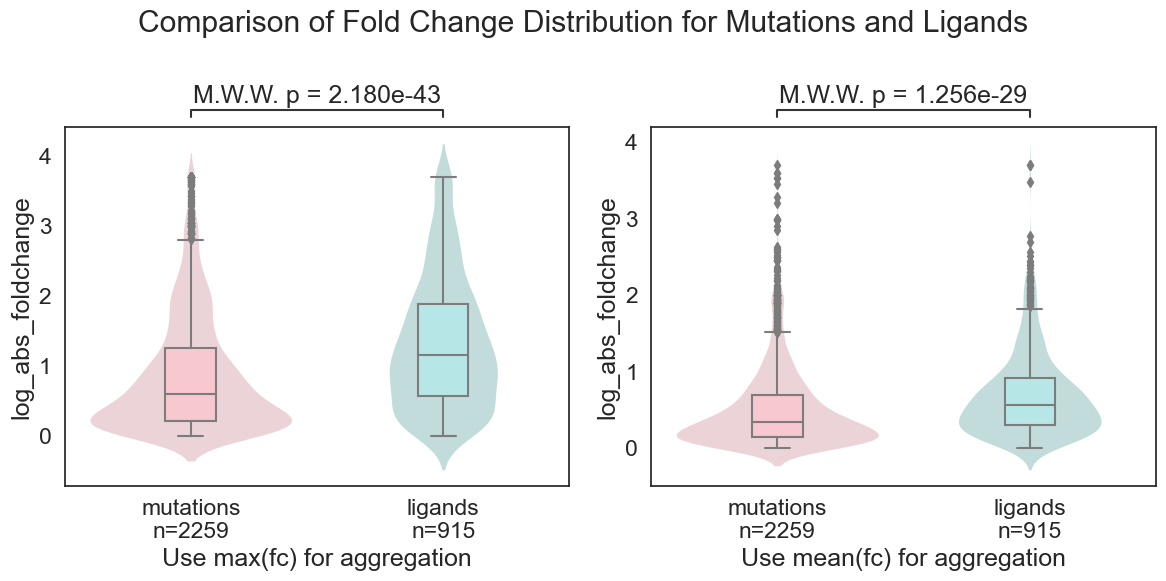

In [1044]:

sns.set_style("white")
# sns.set_palette("muted")
sns.set_context("notebook", font_scale=1.5)

mlgb = gpcr_ori.copy(deep=True)
# mlgb['abs_foldchange'] = np.abs(mlgb['exp_fold_change'])
mlgb['log_abs_foldchange'] = np.log10(np.abs(mlgb['exp_fold_change']))

mut_pos_max = pd.DataFrame(mlgb.groupby(by=['protein',"mutation_pos","mutation_from"]).max()[['log_abs_foldchange']].values,columns=['log_abs_foldchange'])
mut_pos_max['label']='mutations'
ligand_max = pd.DataFrame(mlgb.groupby(by=["ligand_name"]).max()[['log_abs_foldchange']].values,columns=['log_abs_foldchange'])
ligand_max['label']='ligands'
mlgb_df_max = pd.concat([mut_pos_max,ligand_max],axis=0)

mut_pos_mean = pd.DataFrame(mlgb.groupby(by=['protein',"mutation_pos","mutation_from"]).mean()[['log_abs_foldchange']].values,columns=['log_abs_foldchange'])
mut_pos_mean['label']='mutations'
ligand_mean = pd.DataFrame(mlgb.groupby(by=["ligand_name"]).mean()[['log_abs_foldchange']].values,columns=['log_abs_foldchange'])
ligand_mean['label']='ligands'
mlgb_df_mean = pd.concat([mut_pos_mean,ligand_mean],axis=0)


# Create a figure with two subplots
fig, axes = plt.subplots(ncols=2, figsize=(12, 6))
# set colors
# my_pal = {"mutation positions": sns.color_palette("Pastel1")[0], "ligands": sns.color_palette("Pastel2")[0]}
my_pal = {"mutations": 'pink', "ligands": 'paleturquoise'}

#make boxplot with weltch test
pairs = [('mutations', 'ligands')]   

sns.violinplot(data = mlgb_df_max,x="label", y='log_abs_foldchange',ax=axes[0],inner=None,palette=my_pal,linewidth=0,saturation=0.4)
sns.boxplot(data = mlgb_df_max,x="label", y='log_abs_foldchange',ax=axes[0],palette=my_pal, width=0.2,boxprops={'zorder': 2})



add_stat_annotation(axes[0], data=mlgb_df_max, x="label", y='log_abs_foldchange',
                    box_pairs= pairs,
                    test='Mann-Whitney', text_format='full', loc='outside', verbose=2)
# axes[0].set_title("Use max(abs_foldchange) for each position or ligand")
axes[0].set_xlabel("Use max(fc) for aggregation")
sns.violinplot(data = mlgb_df_mean,x="label", y='log_abs_foldchange',ax=axes[1],inner=None,palette=my_pal,linewidth=0,saturation=0.4)
sns.boxplot(data = mlgb_df_mean,x="label", y='log_abs_foldchange',ax=axes[1],palette=my_pal, width=0.2,boxprops={'zorder': 2})

add_stat_annotation(axes[1], data=mlgb_df_mean, x="label", y='log_abs_foldchange',
                    box_pairs= pairs,
                    test='Mann-Whitney', text_format='full', loc='outside', verbose=2)   
axes[1].set_xlabel("Use mean(fc) for aggregation")
# axes[1].set_title("Use mean(abs_foldchange) for each position or ligand")
# size_df = pd.DataFrame()
# size_df['name'] = mlgb_df['label'].value_counts().index
# size_df['size'] = mlgb_df['label'].value_counts().values

# # set the tick labels as the combination of class name and sample size
# xticklabels = [f"{class_name}\nn={size_df[size_df['name']==class_name]['size'].tolist()[0]}" for class_name in ['mut_pos','ligand']]
# plt.xticks(range(size_df.shape[0]), xticklabels)
size_df = pd.DataFrame({'name': mlgb_df_max['label'].value_counts().index, 'size': mlgb_df_max['label'].value_counts().values})
xticklabels = [f"{class_name}\nn={size_df[size_df['name']==class_name]['size'].tolist()[0]}" for class_name in ['mutations','ligands']]

for ax in axes:
    ax.set_xticklabels(xticklabels)

# Add figure title
fig.suptitle(f"Comparison of Fold Change Distribution for Mutations and Ligands")

# plt.yscale('log')
plt.tight_layout()
# plt.savefig(f'boxplot_fc_mutpos_vs_ligand_allGPCR.png')
plt.show()

dabes version

(0.984313725490196, 0.6039215686274509, 0.6)

mut_pos v.s. ligand: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=4.548e-01 U_stat=1.800e+01


(<Axes: xlabel='label', ylabel='log_abs_foldchange'>,
 [<statannot.StatResult.StatResult at 0x7fa4e89cf400>])

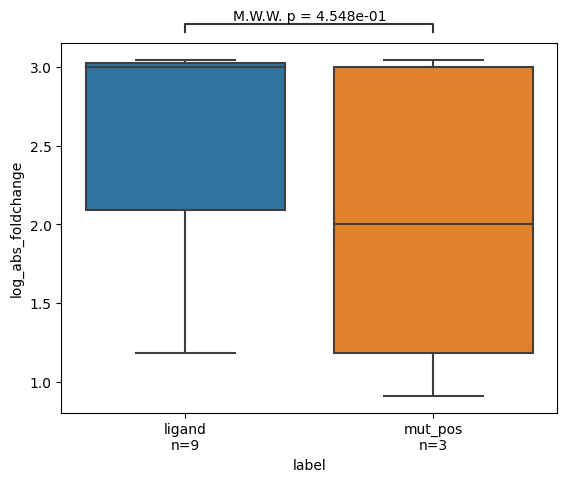

In [821]:

pairs = [('mut_pos', 'ligand')]   # 'NDM' vs 'DM'
# fig, ax = plt.subplots(figsize=(8, 6))
ax = sns.boxplot(data = mlgb_df,x="label", y='log_abs_foldchange')
l_list = mlgb_df['label'].value_counts().index.tolist()

# get the sample size for each function annotation
nobs = mlgb_df['label'].value_counts().values.tolist()

# set the tick labels as the combination of class name and sample size
xticklabels = [f"{class_name}\nn={nobs[i]}" for i, class_name in enumerate(l_list)]
plt.xticks(range(len(l_list)), xticklabels)
add_stat_annotation(ax, data=mlgb_df, x="label", y='log_abs_foldchange',
                    box_pairs= pairs,
                    test='Mann-Whitney', text_format='full', loc='outside', verbose=2)
